# **Análisis de Sentimientos con Aprendizaje Incremental y Detección de Drift**

**Autores**:

- *Alejandro Díaz Cuéllar, 100472173*
  
- *Ilias El Hanouch Toudghi, 100472198*
  
- *Diego Navas Sánchez, 100472123*


## **1. Introducción y Contexto del Proyecto**

En la era del Big Data y la información en tiempo real, el procesamiento de flujos de datos se ha convertido en una necesidad fundamental para organizaciones que requieren análisis inmediatos y adaptación continua a patrones cambiantes. El presente proyecto aborda esta problemática implementando una solución integral de análisis de sentimientos que opera sobre flujos de datos de Twitter, utilizando técnicas de aprendizaje automático incremental.

### *Objetivos Específicos*

El objetivo principal de esta práctica es diseñar y desarrollar una solución robusta a un problema real y bien definido que implique el uso intensivo de flujos de datos.

Para este propósito, empleamos el dataset Sentiment140, que contiene tweets etiquetados procesados como un flujo continuo de datos mediante lectura secuencial de archivos CSV. Esta aproximación simula un entorno de producción donde los datos llegan de forma continua y requieren procesamiento inmediato.

Asimismo, el dataset de COVID-19 será utilizado para labores de regresión incremental.

La solución implementada utiliza principalmente la biblioteca River, una framework especializada en aprendizaje automático incremental por flujo de datos, abordando de forma integral y obligatoria los siguientes conceptos técnicos:
- **Tratamiento de Texto Avanzado**: Procesamiento de lenguaje natural adaptado para flujos de datos con técnicas de vectorización incremental
- **Detección de Model Drift**: Implementación de algoritmos para identificar tanto Concept Drift (cambios en la relación entre variables predictoras y variable objetivo) como Data Drift (cambios en la distribución de las variables de entrada)
- **Clasificación Incremental**: Desarrollo de modelos de clasificación que se adaptan continuamente a nuevos patrones de datos sin reentrenamiento completo
- **Regresión Incremental**: Implementación de técnicas de regresión que evolucionan con los datos para mantener precisión predictiva
- **Agrupamiento Incremental (Clustering)**: Aplicación de algoritmos de clustering que identifican patrones emergentes en el flujo de datos
- **Ensembles Incrementales**: Combinación de múltiples modelos que se ajustan dinámicamente para maximizar el rendimiento predictivo

### *Metodología de Implementación*

El proyecto utiliza una metodología de análisis de flujos de datos que simula condiciones reales de streaming mediante la lectura secuencial de archivos CSV. Esta aproximación permite evaluar la capacidad de adaptación de los algoritmos ante cambios temporales en los patrones de datos, proporcionando un entorno controlado pero realista para la experimentación con técnicas de aprendizaje incremental.

## **2. Estado del arte**

### *Sentiment140 como corpus fundacional*

El trabajo de Go, Bhayani y Huang (2009) introdujo Sentiment140, un conjunto de 1,6 millones de tuits etiquetados automáticamente a partir de emoticonos. La propuesta demostró que era posible entrenar modelos supervisados simples Naive Bayes, Máxima Entropía, SVM con un volumen masivo de datos ruidosos y obtener resultados competitivos. Desde entonces, Sentiment140 se convirtió en un recurso de referencia, ampliamente utilizado para preentrenamiento, como baseline comparativo y como fuente de distant supervision en el dominio de Twitter.

En el caso de nuestro trabajo vamos a usar precisamente como referencia Naive Bayes, también mencionado en la teoría como uno de los modelos que mejor trabaja con tratamiento de texto, porque, a pesar de asumir que las palabras son independientes, captura de manera efectiva las señales clave de cada clase. Su simplicidad permite manejar vectores de alta dimensión con miles de palabras, es rápido de entrenar y predecir, y tolera bien datos escasos gracias al suavizado. Esto lo convierte en un algoritmo eficiente y robusto para clasificación de texto, especialmente como baseline en tareas de análisis de sentimiento.

El enfoque de Naive Bayes sobre [Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140) ha sido ampliamente explorado en la práctica. Un ejemplo muy ilustrativo es el notebook de [Kaggle](https://www.kaggle.com/code/lykin22/twitter-sentiment-analysis-with-naive-bayes-85-acc) publicado por *lykin22*, que trabaja sobre este conjunto de datos y muestra un pipeline completo: muestreo del corpus, limpieza ligera de los tuits (eliminación de URLs, menciones, normalización de mayúsculas), vectorización y entrenamiento de un clasificador Naive Bayes, alcanzando alrededor de un 85% de precisión en su partición de prueba. Este notebook refleja un patrón común cuando se trabaja con datasets muy grandes, combinando eficiencia y escalabilidad sin sacrificar demasiado rendimiento.

En la literatura y en notebooks prácticos se observa que este tipo de enfoque suele implementarse por lotes o en streaming, para procesar grandes volúmenes de datos sin saturar la memoria. Los pasos típicos incluyen dividir el corpus en bloques manejables, preprocesar cada lote de forma consistente, vectorizarlo y aplicar `partial_fit` del modelo Naive Bayes (Multinomial o Bernoulli) para actualizar el clasificador de manera incremental. Adicionalmente, se aplican técnicas como suavizado de Laplace, manejo explícito de negaciones y selección de n‑gramas para mejorar la precisión.

Inspirándonos en este esquema, en nuestro trabajo reproducimos un enfoque similar, solo que realizándolo de forma incremental.

### *Colecciones de tuits sobre COVID-19*

Con la llegada de la pandemia, aparecieron repositorios masivos centrados en COVID-19.

El más influyente es el compilado por [A. K. Chakraborty](https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset) y utilizado en este proyecto asimismo. Aunque se compone de varios tweets divididos en diferentes fases entre 2020-21 (lo cuál aparte de la pandemia como tal, seguramente incluya referencias a la campaña de vacuinación), nos centraremos en el período comprendido entre abril y junio de 2020, que coincide precisamente con la fase más relevante de la pandemia desde su inicio.

Con respecto a este dataset, aunque la mayoría de trabajos están orientados a tareas de clasificación, donde mismamente el autor del dataset propone en su [trabajo](https://www.researchgate.net/publication/373088528_Sentiment_Analysis_on_Large-Scale_Covid-19_Tweets_using_Hybrid_Convolutional_LSTM_Based_on_Naive_Bayes_Sentiment_Modeling) un enfoque híbrido que combina Naive Bayes con redes neuronales convolucionales y LSTM bidireccionales para clasificar tweets relacionados con COVID-19, nosotros lo adaptamos a una tarea de regresión que, como se verá más adelante, está centrada en la detección de grado de positividad, usando técnicas de procesamiento de texto.

### *Evolución metodológica*

La literatura muestra una transición clara: de clasificadores lineales y features tradicionales (n-gramas, TF-IDF, léxicos) a arquitecturas profundas.

En la primera etapa, CNNs y LSTMs fueron habituales para modelar secuencias textuales en Twitter. A partir de 2019, la irrupción de los transformers y modelos LLM, ofrecieron mejoras sustanciales en tareas de clasificación de sentimiento y análisis contextual en comparación con arquitecturas anteriores. La adaptación al dominio de Twitter se volvió un factor crítico para superar ambigüedades, lenguaje informal y ruido.

En el contexto del proyecto, optamos por usar enfoques clásicos por evidentes limitaciones computaciones y temporales y teóricos según lo impartido en la propia asignatura, aunque nunca descartando la posible adaptación para modelos más avanzados en enfoques futuros.

### *Síntesis*

El estado del arte muestra la convergencia entre grandes corpus de etiquetado automático, como Sentiment140, y colecciones temáticas construidas en situaciones de crisis, como los datasets de COVID-19. La combinación de diferentes técnicas de aprendizaje ha permitido capturar tanto patrones generales de polaridad en Twitter como dinámicas afectivas asociadas a eventos puntuales. Sin embargo, la literatura coincide en que los problemas de ruido, cambio semántico, ironía y sesgos poblacionales siguen siendo retos abiertos que deben considerarse en cualquier pipeline contemporáneo de análisis de sentimiento sobre Twitter.

Además, la "baja popularidad" de los modelos incrementales, cuya preferencia es menor por su, generalmente peor desempeño frente a los modelos por lotes, supone un reto para esta práctica, donde deberemos diseñar, entrenar y evalurar modelos de aprendizaje incremental.


## **3. Configuración del Entorno y Carga de Librerías**

Comenzamos cargando todas las librerías necesarias para la ejecución del notebook.

In [1]:
# Importacion de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# River para aprendizaje incremental
from river import naive_bayes, linear_model, cluster, drift, metrics, ensemble, preprocessing, feature_extraction
from river.compose import Pipeline

# Procesamiento de texto
import re
from collections import Counter
import string

# Utilidades
import time
from datetime import datetime
import random

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerias importadas correctamente")

Librerias importadas correctamente


## **4. Carga y Exploración del Dataset Sentiment140**

Previo a la fase de construcción de un modelo de aprendizaje automático dentro de un flujo de datos, resulta fundamental una exploración previa de los datos. Si bien en el contexto operativo de un flujo de datos en producción solo se conoce el tipo de datos que se reciben, este proceso constituye la toma de contacto inicial con el dataset y establece una etapa preliminar crítica para la correcta comprensión y la subsiguiente preparación de los datos para el flujo.

Esta actividad de exploración inicial, que no replicaremos en tiempo real durante la fase de inferencia del flujo de datos, establece el fundamento para definir las transformaciones y estrategias de preprocesamiento que serán implementadas en el pipeline productivo. El proceso permite el diseño de un flujo de datos robusto y eficiente, capaz de anticipar y gestionar las características intrínsecas de la información, garantizando así la recepción de datos de máxima calidad por el modelo.

En primer lugar, consultamos las diferentes columnas del dataset, así como la distribución de la variable objetivo. Además, realizamos un mapeo de esta variable, haciendo que el valor 4, que indica sentimiento positivo, pase a ser 1 para un mejor entendimiento de ésta.

In [2]:
# Carga del dataset
df = pd.read_csv('data/dataset.csv', encoding='latin-1')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

print(f"Dataset shape: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")
print(f"\nDistribucion target:")
print(df['target'].value_counts())

# Mapeo de targets: 0->0 (negativo), 4->1 (positivo)
df['sentiment'] = df['target'].map({0: 0, 4: 1})

print(f"\nPrimeras muestras:")
display(df[['text', 'sentiment']].head())

Dataset shape: (1600000, 6)
Columnas: ['target', 'ids', 'date', 'flag', 'user', 'text']

Distribucion target:
target
0    800000
4    800000
Name: count, dtype: int64

Primeras muestras:


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Debido a que llevaremos a cabo un procesamiento del texto durante el flujo de los datos, se realiza una exploración de las características intrínsecas de éste. Se estudian tanto la longitud de los tweets como el número de palabras que contiene con el fin de explorar la extensión y el detalle léxico del contenido.

Para comprender la distribución de estas métricas a nivel global, se genera una visualización compuesta que incluye dos histogramas. El primer gráfico ilustra la distribución de la longitud del texto en caracteres, y el segundo muestra la distribución del conteo de palabras.

Estadisticas de texto:
Longitud promedio: 74.1
Palabras promedio: 13.2


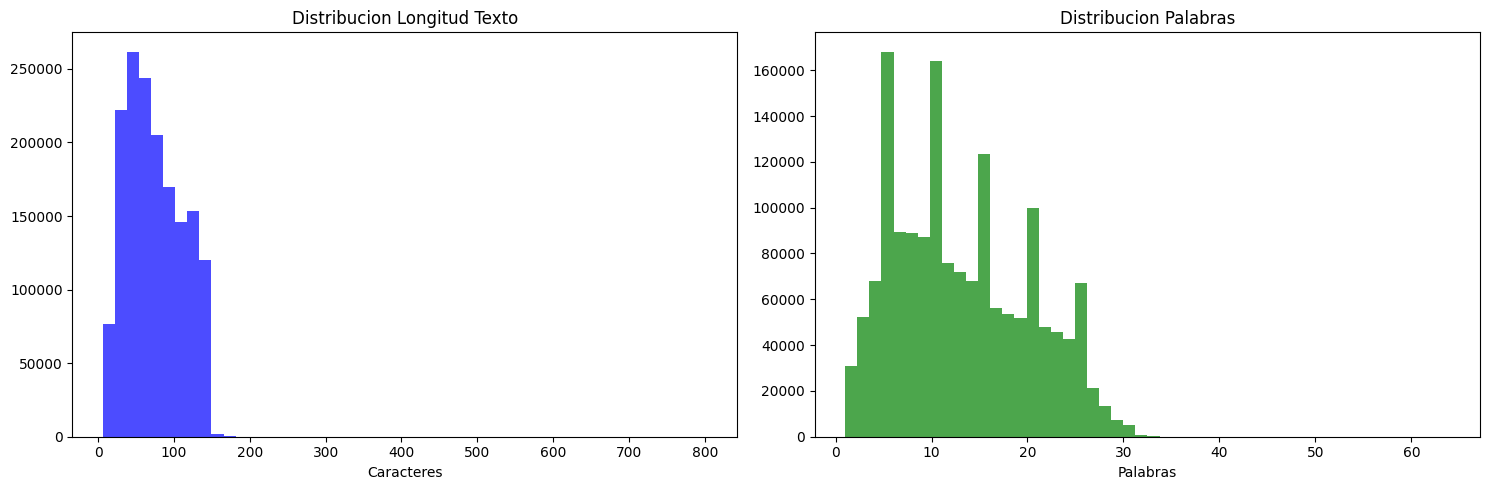

In [3]:
# Exploracion basica del texto
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Estadisticas de texto:")
print(f"Longitud promedio: {df['text_length'].mean():.1f}")
print(f"Palabras promedio: {df['word_count'].mean():.1f}")

# Visualizacion distribucion
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df['text_length'], bins=50, alpha=0.7, color='blue')
axes[0].set_title('Distribucion Longitud Texto')
axes[0].set_xlabel('Caracteres')

axes[1].hist(df['word_count'], bins=50, alpha=0.7, color='green')
axes[1].set_title('Distribucion Palabras')
axes[1].set_xlabel('Palabras')

plt.tight_layout()
plt.show()

Los resultados de la exploración indican que el dataset se caracteriza por textos predominantemente cortos y de una longitud máxima cercana a los 200 caracteres, algo esperable debido a que los tweets tienen limitada esta característica. Esta brevedad se confirma en la visualización de las distribuciones: ambos histogramas presentan un sesgo marcado hacia valores bajos. La mayoría de las entradas se concentran entre 0 y 150 caracteres, con un pico de frecuencia cerca de 5 a 10 palabras. Aunque existen textos mucho más largos, estos son minoritarios y pueden considerarse como una anomalía.

## **5. Preprocesamiento de Texto para Streaming**

Ahora, definimos la función clean_text, cuya responsabilidad es la normalización y limpieza inicial de las cadenas de texto y que se empleará para preprocesar el texto durante el streaming. Este proceso es crucial para reducir el ruido en los datos.

Posteriormente, procedemos a la preparación del subconjunto de datos base para las evaluaciones de rendimiento del modelo. Se establece un límite de 1200000 instancias con el objetivo de acelerar la ejecución, permitiendo un ciclo de desarrollo más rápido sin necesidad de escalar la ejecución al dataset completo. Además, se mantiene la distribución de la variable objetivo, garantizando que el subconjunto mantenga una representación proporcional de las clases originales, lo cual es fundamental para una generalización de los resultados.

In [4]:
# Funcion de limpieza de texto
def clean_text(text):
    # Minusculas
    text = text.lower()
    # Remover URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remover menciones y hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remover puntuacion
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remover espacios extra
    text = ' '.join(text.split())
    return text

# Preparar datos base para streaming (sin limpieza previa)
MAX_MUESTRAS = 120000
stream_data = df.sample(n=min(MAX_MUESTRAS, len(df))).reset_index(drop=True)
print(f"Datos preparados para streaming: {stream_data.shape[0]} muestras")
print(f"Distribucion sentimientos: {stream_data['sentiment'].value_counts().to_dict()}")

Datos preparados para streaming: 120000 muestras
Distribucion sentimientos: {1: 60304, 0: 59696}


## 6. **Clasificación**
En este primer apartado de entrenamiento vamos a intentar resolver un problema de clasificación. El problema en concreto será la clasificación binaria de tweets en dos clases de sentimiento, negativa (0) o positiva (1), usando el dataset de Sentiment140 que hemos tratado en los apartados anteriores.

Se utilizará el dataset como un flujo de datos con River, donde se simulará un flujo de tweets para poder realizar la clasificación incremental.

### *Métricas y detectores de drift*
Para abordar el problema de clasificación binaria en un flujo de datos es fundamental no solo evaluar el rendimiento del modelo, sino también monitorizar posibles **cambios en la distribución de los datos (data drift)** o en la relación entre las variables y la etiqueta (concept drift). Estos fenómenos son habituales en problemas de **streaming** como el análisis de sentimiento, ya que el lenguaje en redes sociales cambia con el tiempo (nuevos hashtags, expresiones, ironías, etc.).  

#### Detectores de drift  

- **Concept drift – Page-Hinkley Test (PH):**  
  Se utiliza el detector Page-Hinkley para monitorizar cambios en el rendimiento del modelo a lo largo del tiempo. Este método detecta cambios en el valor medio de una única variable (en nuestro caso, el error). Es muy usado en flujos de datos por su bajo coste y detección temprana de cambios abruptos, lo que lo hace idóneo para nuestro problema. Su única desventaja es que puede no detectar tan bien los cambios graduales.

  En nuestro caso, empleamos este detector con una configuración de parámetros en la que nos aseguramos una exigencia alta para la detección del concept drift. Esto se debe a que reiniciamos el modelo cada vez que se lleva a cabo esta detección. Por lo tanto, buscamos minimizar al máximo los falsos positivos, dado que se producirá una pérdida de rendimiento significativa y supondrá un coste computacional extra el hecho de detectar concept drift.

- **Data drift – ADWIN aplicado a variables estadísticas:**  
  Para vigilar el **data drift** se utiliza el detector **ADWIN (Adaptive Windowing)** sobre la media de un conjunto de variables numéricas derivadas de los tweets:  
  - `text_length`: longitud del texto.  
  - `word_count`: número de palabras.  
  - `has_hashtags`: presencia de hashtags.  
  - `has_mentions`: presencia de menciones.  
  - `has_urls`: presencia de URLs.  
  - `has_exclamation`: presencia de signos de exclamación.  
  - `has_question`: presencia de signos de interrogación.  
  - `char_diversity`: diversidad de caracteres en el texto.  

  ADWIN mantiene una ventana deslizante cuyo tamaño se adapta dinámicamente. Si detecta que la media de estas variables cambia significativamente entre dos subventanas, se interpreta como un posible **data drift**. Esto permite capturar cambios en la forma en la que los usuarios generan tweets (más cortos, con más menciones, aparición de nuevas formas de escritura, etc.), lo cual puede afectar al rendimiento del modelo.  


#### Métricas de evaluación  

Para evaluar el desempeño del modelo de clasificación binaria se emplean varias métricas complementarias, ya que en problemas de sentimiento no basta con medir solo la exactitud:  

- **Accuracy:** mide el porcentaje de aciertos sobre el total de ejemplos.   

- **Precision:** mide la proporción de predicciones positivas que realmente son positivas. Es útil para evaluar la calidad de las predicciones de clase positiva (sentimiento positivo).  

- **Recall:** mide la proporción de verdaderos positivos que el modelo logra identificar correctamente. Es especialmente importante si queremos minimizar los falsos negativos (ej. no dejar escapar tweets realmente positivos o negativos).  

- **F1-score:** combina precisión y recall en una única métrica armónica. Es útil como medida equilibrada, sobre todo en escenarios de clases desbalanceadas, ya que penaliza cuando una de las dos (precision o recall) es baja.  


In [5]:
# Configuracion detectores de drift
concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)
data_drift_detector = drift.ADWIN(delta=0.002)
# Metricas para evaluacion
accuracy_metric = metrics.Accuracy()
precision_metric = metrics.Precision()
recall_metric = metrics.Recall()
f1_metric = metrics.F1()

# Almacenamiento de resultados
results = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'concept_drifts': [],
    'data_drifts': [],
    'timestamps': []
}

# Features disponibles en el primer dataset (Sentiment140)
features_data_drift = {
    'text_length': [],
    'word_count': [],
    'has_hashtags': [],
    'has_mentions': [],
    'has_urls': [],
    'has_exclamation': [],
    'has_question': [],
    'char_diversity': []
}

print("Detectores de drift configurados")
print(f"Concept drift: Page-Hinklet (threshold={concept_drift_detector.threshold})")
print(f"Data drift: Page-Hinkley (delta={data_drift_detector.delta})")
print(f"Features para data drift: {list(features_data_drift.keys())}")

Detectores de drift configurados
Concept drift: Page-Hinklet (threshold=50)
Data drift: Page-Hinkley (delta=0.002)
Features para data drift: ['text_length', 'word_count', 'has_hashtags', 'has_mentions', 'has_urls', 'has_exclamation', 'has_question', 'char_diversity']


### *Clasificación con Naive Bayes Incremental*

Para el problema de clasificación de tweets en positivo o negativo se utiliza un **pipeline** compuesto por dos pasos principales:  

1. **Vectorización con TF-IDF (Term Frequency – Inverse Document Frequency):**  
   - Los tweets son textos, por lo que primero necesitamos transformarlos en una representación numérica que el modelo pueda procesar.  
   - La técnica TF-IDF asigna un peso a cada palabra en función de:  
     - Su frecuencia en el tweet (TF).  
     - Su frecuencia inversa en el corpus (IDF), de forma que palabras muy comunes como *"the"* o *"and"* tengan menos peso, mientras que palabras más representativas del sentimiento (como *"good"*, *"bad"*, *"love"*, *"hate"*) tengan mayor relevancia.  
   - Esto permite capturar mejor las señales relevantes de los textos para el análisis de sentimiento.  

2. **Clasificación con Multinomial Naive Bayes (MNB):**  
   - Este algoritmo es especialmente adecuado para problemas de **clasificación de texto** porque trabaja bien con representaciones de frecuencia de palabras (como bag-of-words o TF-IDF).  
   - Asume independencia condicional entre las palabras, lo que simplifica el cálculo y permite una actualización muy eficiente en un escenario de **aprendizaje incremental**.  
   - Además, MNB es rápido, poco costoso computacionalmente y suele ofrecer resultados competitivos en tareas de **sentiment analysis**.  

#### Bucle de entrenamiento  

La idea principal es procesar los datos en pequeños batches, aplicando preprocesamiento, predicción, actualización del modelo y detección de drift en tiempo real. De forma general, los pasos son:  

1. **Preprocesamiento en tiempo real:**  
   Cada tweet se limpia y transforma en un formato adecuado para el modelo (texto preprocesado).  
   Además, se calculan variables estadísticas simples (longitud, número de palabras, presencia de hashtags, menciones, URLs, signos, diversidad de caracteres) que servirán para monitorizar posibles **cambios en los datos (data drift)**.  

2. **Predicción y actualización de métricas:**  
   El clasificador realiza una predicción para el tweet actual y se actualizan las métricas de rendimiento (accuracy, precision, recall y f1-score). Esto permite monitorizar la calidad del modelo durante todo el flujo.  

3. **Detección de concept drift:**  
   Se utiliza el detector **Page-Hinkley** sobre los errores del modelo.  
   - Si detecta un **concept drift**, significa que la relación entre los tweets y las etiquetas de sentimiento ha cambiado.  
   - En ese caso, se reinicia tanto el detector como el modelo Naive Bayes para empezar a aprender de la nueva distribución.  

4. **Detección de data drift:**  
   Con las variables estadísticas calculadas de cada tweet, se actualiza el detector **ADWIN**.  
   - Si se detecta un cambio significativo en sus medias, se considera un **data drift** (cambio en la distribución de los tweets).  
   - Cuando esto ocurre, se reinicia el detector para seguir vigilando futuras variaciones.  

5. **Aprendizaje incremental:**  
   Tras cada predicción, el clasificador se entrena con el nuevo tweet y su etiqueta real

In [12]:
# Pipeline de clasificacion con Naive Bayes y TF-IDF
text_classifier = Pipeline(
    feature_extraction.TFIDF(lowercase=True, strip_accents=True, on='text'),
    naive_bayes.MultinomialNB(alpha=1.0)
)

# Funcion de streaming para clasificacion con preprocesamiento en tiempo real
def streaming_classification(data, classifier, batch_size=1000):
    global concept_drift_detector, data_drift_detector, features_data_drift, accuracy_metric, precision_metric, recall_metric, f1_metric
    drift_points = []
    n_samples = len(data)
    sample_count = 0  # ← Contador secuencial

    for i in range(0, n_samples, batch_size):
        batch_end = min(i + batch_size, n_samples)
        batch = data[i:batch_end]

        for j, row in batch.iterrows():
            sample_count += 1  # ← Incrementar contador
            # Preprocesamiento en tiempo real
            raw_text = row['text']
            clean_text_sample = clean_text(raw_text)

            # Calcular features para data drift (disponibles en primer dataset)
            text_length = len(raw_text)
            word_count = len(raw_text.split())
            has_hashtags = 1 if '#' in raw_text else 0
            has_mentions = 1 if '@' in raw_text else 0
            has_urls = 1 if any(url in raw_text.lower() for url in ['http', 'www', '.com', '.org']) else 0
            has_exclamation = 1 if '!' in raw_text else 0
            has_question = 1 if '?' in raw_text else 0
            char_diversity = len(set(raw_text.lower())) / max(len(raw_text), 1)

            # Preparar features para el modelo
            x = {'text': clean_text_sample}
            y = row['sentiment']

            # Prediccion
            y_pred = classifier.predict_one(x)

            # Actualizacion de metricas
            accuracy_metric.update(y, y_pred)
            precision_metric.update(y, y_pred)
            recall_metric.update(y, y_pred)
            f1_metric.update(y, y_pred)

            # Almacenar features para data drift
            features_data_drift['text_length'].append(text_length)
            features_data_drift['word_count'].append(word_count)
            features_data_drift['has_hashtags'].append(has_hashtags)
            features_data_drift['has_mentions'].append(has_mentions)
            features_data_drift['has_urls'].append(has_urls)
            features_data_drift['has_exclamation'].append(has_exclamation)
            features_data_drift['has_question'].append(has_question)
            features_data_drift['char_diversity'].append(char_diversity)

            # Deteccion de drift
            concept_drift_detector.update(int(y != y_pred))
            if concept_drift_detector.drift_detected:
                print(f"Drift detectado en la muestra {sample_count}")
                drift_points.append(sample_count)
                results['concept_drifts'].append(sample_count)
                # Reiniciar metricas
                accuracy_metric = metrics.Accuracy()
                precision_metric = metrics.Precision()
                recall_metric = metrics.Recall()
                f1_metric = metrics.F1()

                # Reiniciar modelo y detector
                classifier = Pipeline(
                    feature_extraction.TFIDF(lowercase=True, strip_accents=True, on='text'),
                    naive_bayes.MultinomialNB(alpha=1.0)
                )
                concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)

            # Data drift usando features calculadas
            feature_vector = [text_length, word_count, has_hashtags, has_mentions, has_urls, has_exclamation, has_question, char_diversity]
            data_drift_detector.update(np.mean(feature_vector))
            if data_drift_detector.drift_detected:
                print(f"Data drift detectado en la muestra {sample_count}")
                results['data_drifts'].append(sample_count)
                data_drift_detector = drift.ADWIN(delta=0.002)

            # Aprendizaje incremental
            classifier.learn_one(x, y)

            # Almacenar resultados cada 5000 muestras
            if sample_count % 5000 == 0:
                results['accuracy'].append(accuracy_metric.get())
                results['precision'].append(precision_metric.get())
                results['recall'].append(recall_metric.get())
                results['f1'].append(f1_metric.get())
                results['timestamps'].append(sample_count)

        if i % 10000 == 0:
            print(f"Procesadas {batch_end:,} muestras - Accuracy: {accuracy_metric.get():.3f}")

    return drift_points

# Ejecutar clasificacion incremental
start_time = time.time()
concept_drifts = streaming_classification(stream_data, text_classifier)
execution_time = time.time() - start_time

print(f"\nClasificacion completada en {execution_time:.2f} segundos")
print(f"Drift points detectados de concepto: {len(concept_drifts)}")
print(f"Drift points detectados de datos: {len(results['data_drifts'])}")
print(f"Accuracy final: {accuracy_metric.get():.3f}")
print(f"Precision final: {precision_metric.get():.3f}")
print(f"Recall final: {recall_metric.get():.3f}")
print(f"F1-Score final: {f1_metric.get():.3f}")

# Estadísticas de features para data drift
print(f"\nEstadísticas de features para data drift:")
for feature_name, values in features_data_drift.items():
    if values:  # Solo si hay datos
        avg_val = np.mean(values)
        print(f"  {feature_name}: promedio = {avg_val:.3f}")

Drift detectado en la muestra 297
Procesadas 1,000 muestras - Accuracy: 0.607
Procesadas 11,000 muestras - Accuracy: 0.710
Procesadas 21,000 muestras - Accuracy: 0.726
Procesadas 31,000 muestras - Accuracy: 0.732
Procesadas 41,000 muestras - Accuracy: 0.738
Drift detectado en la muestra 44767
Procesadas 51,000 muestras - Accuracy: 0.709
Procesadas 61,000 muestras - Accuracy: 0.729
Drift detectado en la muestra 70478
Procesadas 71,000 muestras - Accuracy: 0.580
Procesadas 81,000 muestras - Accuracy: 0.716
Procesadas 91,000 muestras - Accuracy: 0.729
Procesadas 101,000 muestras - Accuracy: 0.736
Drift detectado en la muestra 104588
Procesadas 111,000 muestras - Accuracy: 0.701

Clasificacion completada en 15.43 segundos
Drift points detectados de concepto: 4
Drift points detectados de datos: 0
Accuracy final: 0.720
Precision final: 0.770
Recall final: 0.607
F1-Score final: 0.679

Estadísticas de features para data drift:
  text_length: promedio = 74.261
  word_count: promedio = 13.210
  

- **Accuracy: 0.72** (72% de clasificaciones correctas)
- **F1-Score: 0.67** (balance entre precisión y recall, aunque este último es algo más bajo)
- Frecuencia moderada de **concept drift**, que indica evolución continua del lenguaje y patrones de sentimiento. Por otra parte, la ausencia de data drift indica una distribución estable de los datos entrantes en el flujo

## **7. Regresión Incremental con Dataset de Engagement**
### *Objetivo del Análisis de Regresión*

Para esta implementación, utilizamos un dataset distinto al del resto del notebook debido a que queremos adaptar nuestro objetivo a la regresión. Este nuevo dataset enriquecido contiene métricas de engagement real de Twitter, donde nuestro objetivo es predecir el **score de positividad** de los tweets basándose en características textuales y contextuales. Esta aproximación nos permite:

- **Análisis Predictivo**: Determinar qué factores influyen en la percepción positiva de un tweet
- **Optimización de Contenido**: Identificar patrones que generan mayor engagement positivo  
- **Detección de Anomalías**: Reconocer tweets con comportamiento atípico en términos de sentimiento
- **Adaptación Temporal**: Capturar cambios en las preferencias y patrones de los usuarios a lo largo del tiempo

### *Características del Dataset de Engagement*

El dataset utilizado contiene las siguientes variables:

**Variables Target:**
- **pos**: Score de positividad continuo (0.0 - 1.0) - *Variable objetivo principal*

**Variables Predictoras:**
- **clean_tweet**: Texto del tweet procesado y limpio
- **original_text**: Texto original sin procesamiento
- **source**: Plataforma de origen (Android, iPhone, Web Client)
- **hashtags**: Hashtags utilizados en el tweet
- **user_mentions**: Menciones de usuarios (@usuario)
- **place**: Información geográfica (si disponible)
- **created_at**: Timestamp de creación

Las variables en cambio no usadas son:
- **neg**: Score de negatividad continuo (complementario)
- **neu**: Score de neutralidad continuo  
- **compound**: Score compuesto de sentimiento

Principalmente debido al grave leakage que supone introducir métricas ya no sólo relecionadas, sino ligadas directamente al valor de positividad, que son las que presentan estas distribuciones de probabilidad.

Esta riqueza de variables nos permite implementar un modelo de regresión multivariante que considera tanto aspectos textuales (mediante TF-IDF) como características estructurales y contextuales del tweet.

EXPLORACIÓN DEL DATASET DE REGRESIÓN

INFORMACIÓN GENERAL:
   • Dimensiones del dataset: (143903, 17)
   • Columnas disponibles: ['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']
   • Memoria utilizada: 144.96 MB

ANÁLISIS DE VALORES FALTANTES:
   • id: 2 (0.00%)
   • created_at: 1 (0.00%)
   • source: 27 (0.02%)
   • original_text: 1 (0.00%)
   • lang: 1 (0.00%)
   • favorite_count: 1 (0.00%)
   • retweet_count: 1 (0.00%)
   • original_author: 1 (0.00%)
   • hashtags: 115,393 (80.19%)
   • user_mentions: 36,571 (25.41%)
   • place: 38,882 (27.02%)
   • clean_tweet: 484 (0.34%)

ANÁLISIS DE LA VARIABLE OBJETIVO 'pos':
   • Media: 0.1056
   • Mediana: 0.0000
   • Desviación estándar: 0.1559
   • Mínimo: 0.0000
   • Máximo: 1.0000
   • Rango intercuartílico (Q3-Q1): 0.2060

DISTRIBUCIÓN DE SENTIMIENTOS:
   • Positivo (neu): 57,586 

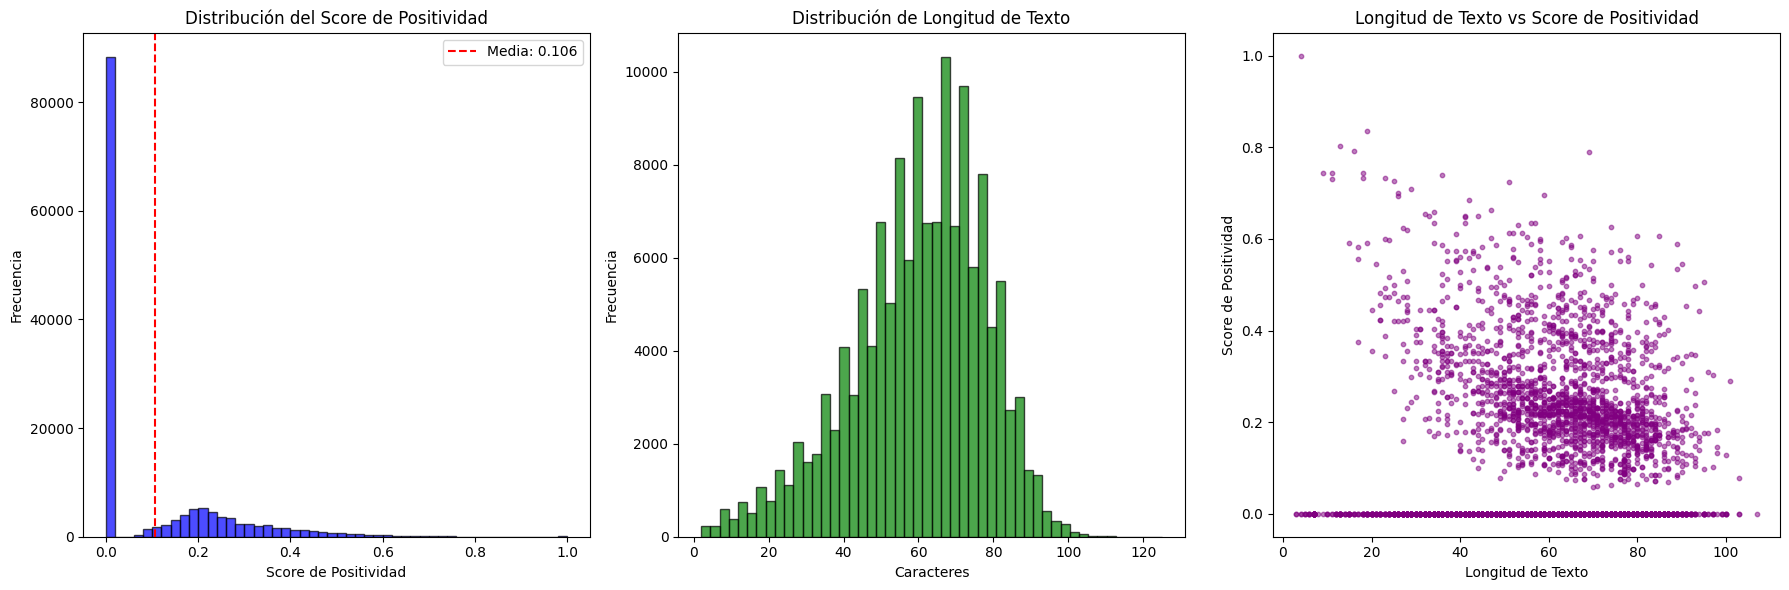

In [25]:
# Exploración exhaustiva del dataset de regresión
print("="*80)
print("EXPLORACIÓN DEL DATASET DE REGRESIÓN")
print("="*80)

# Carga inicial del dataset (sin sampling para exploración completa)
regression_df_full = pd.read_csv('data/dataset_regression.csv')
print(f"\nINFORMACIÓN GENERAL:")
print(f"   • Dimensiones del dataset: {regression_df_full.shape}")
print(f"   • Columnas disponibles: {regression_df_full.columns.tolist()}")
print(f"   • Memoria utilizada: {regression_df_full.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Análisis de valores faltantes
print(f"\nANÁLISIS DE VALORES FALTANTES:")
missing_data = regression_df_full.isnull().sum()
missing_percent = (missing_data / len(regression_df_full)) * 100
for col in missing_data.index:
    if missing_data[col] > 0:
        print(f"   • {col}: {missing_data[col]:,} ({missing_percent[col]:.2f}%)")

# Análisis de la variable objetivo 'pos'
print(f"\nANÁLISIS DE LA VARIABLE OBJETIVO 'pos':")
print(f"   • Media: {regression_df_full['pos'].mean():.4f}")
print(f"   • Mediana: {regression_df_full['pos'].median():.4f}")
print(f"   • Desviación estándar: {regression_df_full['pos'].std():.4f}")
print(f"   • Mínimo: {regression_df_full['pos'].min():.4f}")
print(f"   • Máximo: {regression_df_full['pos'].max():.4f}")
print(f"   • Rango intercuartílico (Q3-Q1): {regression_df_full['pos'].quantile(0.75) - regression_df_full['pos'].quantile(0.25):.4f}")

# Distribución de sentimientos
sentiment_dist = regression_df_full['sentiment'].value_counts()
print(f"\nDISTRIBUCIÓN DE SENTIMIENTOS:")
for sentiment, count in sentiment_dist.items():
    percentage = (count / len(regression_df_full)) * 100
    sentiment_label = "Negativo" if sentiment == 0 else "Positivo"
    print(f"   • {sentiment_label} ({sentiment}): {count:,} tweets ({percentage:.1f}%)")

# Análisis de características textuales
print(f"\nCARACTERÍSTICAS TEXTUALES:")
regression_df_full['text_length_analysis'] = regression_df_full['clean_tweet'].str.len()
regression_df_full['word_count_analysis'] = regression_df_full['clean_tweet'].str.split().str.len()

print(f"   • Longitud promedio del texto: {regression_df_full['text_length_analysis'].mean():.1f} caracteres")
print(f"   • Número promedio de palabras: {regression_df_full['word_count_analysis'].mean():.1f}")
print(f"   • Texto más corto: {regression_df_full['text_length_analysis'].min()} caracteres")
print(f"   • Texto más largo: {regression_df_full['text_length_analysis'].max()} caracteres")

# Análisis de fuentes (source)
print(f"\nANÁLISIS DE FUENTES:")
source_counts = regression_df_full['source'].value_counts().head(5)
for source, count in source_counts.items():
    percentage = (count / len(regression_df_full)) * 100
    print(f"   • {source}: {count:,} ({percentage:.1f}%)")

# Análisis de hashtags y menciones
hashtag_present = regression_df_full['hashtags'].notna().sum()
mentions_present = regression_df_full['user_mentions'].notna().sum()
place_present = regression_df_full['place'].notna().sum()

print(f"\nCARACTERÍSTICAS SOCIALES:")
print(f"   • Tweets con hashtags: {hashtag_present:,} ({hashtag_present/len(regression_df_full)*100:.1f}%)")
print(f"   • Tweets con menciones: {mentions_present:,} ({mentions_present/len(regression_df_full)*100:.1f}%)")
print(f"   • Tweets con ubicación: {place_present:,} ({place_present/len(regression_df_full)*100:.1f}%)")

# Correlación entre variables numéricas
numeric_cols = ['pos', 'neg', 'neu', 'compound', 'text_length_analysis', 'word_count_analysis']
correlation_matrix = regression_df_full[numeric_cols].corr()

print(f"\nCORRELACIONES CON LA VARIABLE OBJETIVO 'pos':")
pos_correlations = correlation_matrix['pos'].sort_values(key=abs, ascending=False)
for var, corr in pos_correlations.items():
    if var != 'pos':
        print(f"   • {var}: {corr:.4f}")

# Visualización de distribuciones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribución de la variable objetivo
axes[0].hist(regression_df_full['pos'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribución del Score de Positividad')
axes[0].set_xlabel('Score de Positividad')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(regression_df_full['pos'].mean(), color='red', linestyle='--',
                label=f'Media: {regression_df_full["pos"].mean():.3f}')
axes[0].legend()

# Distribución de longitud de texto
axes[1].hist(regression_df_full['text_length_analysis'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Distribución de Longitud de Texto')
axes[1].set_xlabel('Caracteres')
axes[1].set_ylabel('Frecuencia')

# Scatter plot: longitud vs positividad
sample_data = regression_df_full.sample(n=min(5000, len(regression_df_full)))
axes[2].scatter(sample_data['text_length_analysis'], sample_data['pos'],
                alpha=0.5, color='purple', s=10)
axes[2].set_title('Longitud de Texto vs Score de Positividad')
axes[2].set_xlabel('Longitud de Texto')
axes[2].set_ylabel('Score de Positividad')

plt.tight_layout()
plt.show()

**Características del Dataset:**
- Dimensiones: 143,903 tweets con 17 variables textuales y numéricas

**Variable Objetivo 'pos' (Score de Positividad):**
- Media: 0.1056 (fuertemente sesgada hacia valores bajos)
- Mediana: 0.0000 (confirma distribución extremadamente asimétrica)
- Rango continuo entre 0 y 1, con fuerte concentración en valores cercanos a cero como revela la propia media
- La mediana de 0.0 indica que al menos el 50% de los tweets tienen positividad nula, lo cual es coherente con lo explorado
- Alta correlacion negativa con las variables 'neg' y 'neu' como era de esperar, al mantener la porporcionalidad inversa; lo cual refuerza el descarte expresado anteriormente

**Interpretación de las Visualizaciones:**
Los gráficos revelan una distribución extremadamente concentrada en el score de positividad con un pico masivo en cero, distribución de longitud de texto típica de Twitter, y correlación débil entre características textuales y sentimiento. La estrategia de sampling debe abordar esta distribución extremadamente desbalanceada para asegurar representatividad en el aprendizaje incremental.

In [8]:
from river import compose
from river import tree

MAX_MUESTRAS = 60000

# Cargar dataset de regresion
regression_df = pd.read_csv('data/dataset_regression.csv')
print(f"Dataset de regresion cargado: {regression_df.shape}")
print(f"Columnas disponibles: {regression_df.columns.tolist()}")

# Explorar target 'pos'
print(f"\nTarget 'pos' - Media: {regression_df['pos'].mean():.3f}, Std: {regression_df['pos'].std():.3f}")
print(f"Rango pos: [{regression_df['pos'].min():.3f}, {regression_df['pos'].max():.3f}]")

# Limpiar datos y preparar para streaming
regression_df = regression_df.dropna(subset=['pos', 'clean_tweet']).reset_index(drop=True)
regression_stream = regression_df.sample(n=min(MAX_MUESTRAS, len(regression_df))).reset_index(drop=True)  # Reducir muestra

print(f"Datos de regresion preparados: {regression_stream.shape[0]} muestras")
print(f"Distribucion de sentimientos: {regression_stream['sentiment'].value_counts().to_dict()}")

text_vectorizer = feature_extraction.TFIDF(
    on='clean_tweet',  # columna de texto
    lowercase=True,    # opcional, para normalizar
)

# Pipeline simplificado SOLO con features numericas (sin TF-IDF)
regression_model = compose.Pipeline(
    ('features', compose.TransformerUnion(
        ('text', text_vectorizer),  # TF-IDF del texto
        ('numeric', compose.Select(
            'text_length', 'word_count',
            'has_hashtags', 'has_mentions', 'has_place', 'source_mobile', 'source_web', 'hour_of_day'
        ))
    )),
    preprocessing.StandardScaler(),  # normaliza todas las features
    tree.HoeffdingAdaptiveTreeRegressor(grace_period=50, delta=1e-5, leaf_prediction='mean')
)

# Metricas de regresion
mae_metric = metrics.MAE()
rmse_metric = metrics.RMSE()
r2_metric = metrics.R2()

# Almacenamiento de resultados
regression_results = {'mae': [], 'rmse': [], 'r2': [], 'predictions': [], 'actuals': [], 'concept_drifts': [], 'data_drifts': []}

# Deteccion de drift
concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)
data_drift_detector = drift.ADWIN(delta=0.002)

print("\nIniciando regresion incremental con features numericas para predecir score de positividad...")

for i, row in regression_stream.iterrows():
    # Preprocesamiento en tiempo real
    tweet_text = str(row['clean_tweet'])
    original_text = str(row['original_text'])

    # Features calculadas en tiempo real (SOLO NUMERICAS)
    text_length = len(tweet_text)
    word_count = len(tweet_text.split())
    original_length = len(original_text)
    char_diversity = len(set(tweet_text.lower())) / max(len(tweet_text), 1)

    # Features de contenido
    has_hashtags = 1 if str(row['hashtags']).strip() not in ['', 'nan'] else 0
    has_mentions = 1 if str(row['user_mentions']).strip() not in ['', 'nan'] else 0
    has_place = 1 if str(row['place']).strip() not in ['', 'nan'] else 0

    # Features de plataforma
    source_text = str(row['source'])
    source_mobile = 1 if any(device in source_text for device in ['iPhone', 'Android']) else 0
    source_web = 1 if 'Web' in source_text else 0

    # Feature temporal (hora del día)
    try:
        created_at = pd.to_datetime(row['created_at'])
        hour_of_day = created_at.hour / 24.0  # Normalizar a [0,1]
    except:
        hour_of_day = 0.5  # Default

    # Preparar features SOLO NUMERICAS para regresion. NEG Y NEU no se usan porque estan altamente correlacionadas con el target
    x_reg = {
        'clean_tweet': tweet_text,  # necesario para TF-IDF
        'text_length': text_length,
        'word_count': word_count,
        'original_length': original_length,
        'char_diversity': char_diversity,
        'has_hashtags': has_hashtags,
        'has_mentions': has_mentions,
        'has_place': has_place,
        'source_mobile': source_mobile,
        'source_web': source_web,
        'hour_of_day': hour_of_day
    }

    # Target: score de positividad
    y_reg = float(row['pos'])

    # Prediccion con clipping para estabilidad
    y_pred_reg = regression_model.predict_one(x_reg)
    y_pred_reg = max(0.0, min(1.0, y_pred_reg))  # Clipear entre 0 y 1
    # Actualizacion metricas
    mae_metric.update(y_reg, y_pred_reg)
    rmse_metric.update(y_reg, y_pred_reg)
    r2_metric.update(y_reg, y_pred_reg)

    # Aprendizaje incremental
    try:
        regression_model.learn_one(x_reg, y_reg)
        concept_drift_detector.update(y_reg)
        data_drift_detector.update(x_reg)
        if concept_drift_detector.drift_detected:
            print(f"Concept drift detectado en la muestra {i}")
            regression_results['concept_drifts'].append(i)
            concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)
            regression_model = compose.Pipeline(
                                ('features', compose.TransformerUnion(('text', text_vectorizer),  # TF-IDF del texto
                                ('numeric', compose.Select( 'text_length', 'word_count',
                                                            'has_hashtags', 'has_mentions', 'has_place', 'source_mobile', 'source_web', 'hour_of_day')))),
                                preprocessing.StandardScaler(),  # normaliza todas las features
                                tree.HoeffdingAdaptiveTreeRegressor(grace_period=50, delta=1e-5, leaf_prediction='mean'))
        if data_drift_detector.drift_detected:
            print(f"Data drift detectado en la muestra {i}")
            regression_results['data_drifts'].append(i)
            data_drift_detector = drift.ADWIN(delta=0.002)
    except:
        pass  # Saltar si falla el aprendizaje

    # Almacenar resultados cada 3000 muestras
    if i % 3000 == 0:
        regression_results['mae'].append(mae_metric.get())
        regression_results['rmse'].append(rmse_metric.get())
        regression_results['r2'].append(r2_metric.get())
        regression_results['predictions'].append(y_pred_reg)
        regression_results['actuals'].append(y_reg)

    if i % 5000 == 0:
        print(f"Regresion Numerica - Muestras: {i:,} - MAE: {mae_metric.get():.4f} - RMSE: {rmse_metric.get():.4f} - R²: {r2_metric.get():.3f}")

print(f"\nRegresion con features numericas completada")
print(f"MAE final: {mae_metric.get():.4f} (score pos)")
print(f"RMSE final: {rmse_metric.get():.4f} (score pos)")
print(f"R² final: {r2_metric.get():.3f}")

# Analisis de predicciones
if len(regression_results['predictions']) > 0:
    last_predictions = regression_results['predictions'][-5:]
    last_actuals = regression_results['actuals'][-5:]

    print(f"\nÚltimas predicciones vs valores reales (score de positividad):")
    for i, (pred, actual) in enumerate(zip(last_predictions, last_actuals)):
        error = abs(pred - actual)
        print(f"  Muestra {i+1}: Predicho={pred:.4f}, Real={actual:.4f}, Error={error:.4f}")

    # Estadisticas del modelo
    print(f"\nEstadísticas del modelo:")
    print(f"Error promedio absoluto: {mae_metric.get():.4f}")
    print(f"Varianza explicada (R²): {r2_metric.get():.3f}")

    baseline_mae = abs(0.5 - regression_stream['pos'].mean())
    print(f"Baseline (predicción constante): MAE = {baseline_mae:.4f}")

    print(f"\nEvaluación del drift:")
    if regression_results['concept_drifts']:
        print(f"  Concept drifts detectados en muestras: {regression_results['concept_drifts']}")
    else:
        print("  No se detectaron concept drifts.")
    if regression_results['data_drifts']:
        print(f"  Data drifts detectados en muestras: {regression_results['data_drifts']}")
    else:
        print("  No se detectaron data drifts.")

    if r2_metric.get() > 0:
        print("El modelo explica mejor que una predicción constante")
    else:
        print("El modelo no supera una predicción constante")

    if mae_metric.get() < baseline_mae:
        print("El modelo supera al baseline en MAE")
    else:
        print("El modelo no supera al baseline en MAE")

Dataset de regresion cargado: (143903, 17)
Columnas disponibles: ['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']

Target 'pos' - Media: 0.106, Std: 0.156
Rango pos: [0.000, 1.000]
Datos de regresion preparados: 60000 muestras
Distribucion de sentimientos: {'neu': 23837, 'pos': 19320, 'neg': 16843}

Iniciando regresion incremental con features numericas para predecir score de positividad...
Regresion Numerica - Muestras: 0 - MAE: 0.0000 - RMSE: 0.0000 - R²: 0.000
Regresion Numerica - Muestras: 5,000 - MAE: 0.1234 - RMSE: 0.1521 - R²: 0.034
Regresion Numerica - Muestras: 10,000 - MAE: 0.1217 - RMSE: 0.1504 - R²: 0.061
Regresion Numerica - Muestras: 15,000 - MAE: 0.1218 - RMSE: 0.1509 - R²: 0.064
Regresion Numerica - Muestras: 20,000 - MAE: 0.1221 - RMSE: 0.1518 - R²: 0.062
Regresion Numerica - Muestras: 25,000 - MAE: 0.1217 - RMS

- **MAE: 0.1230** - Error promedio de 0.123 puntos en escala [0,1]
- **RMSE: 0.1527** - Penaliza errores grandes, indica algunos outliers

**Detección de Drift:**
- **No se detectaron concept drifts** - Relación features-target estable
- **No se detectaron data drifts** - Distribución de características consistente


El modelo supera baselines (predicción constante y MAE baseline) en un dataset extremadamente sesgado (mediana 0.0, media 0.1056). Las métricas son prometedoras considerando la distribución desbalanceada del target.

## **8. Clustering**

Para el apartado de clustering, se decidió utilizar un nuevo dataset, dado que sentiment140 no nos ofrecía los datos necesarios para poder realizar un proceso de clustering competente. Para seguir en la dinámica de análisis de tweets o posts de redes sociales, decidimos utilizar el dataset "US Election 2020", disponible en Kaggle: https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets.

Este dataset (dividido en 2) contiene información sobre tweets relacionados con las elecciones presidenciales de EE.UU en el año 2020, que enfrentaron a Donald Trump y Joe Biden. En particular nos encontramos con dos datasets, uno con tweets que contienen el hashtag #Trump y otro con tweets con el hashtag #Biden.

El objetivo de este apartado es realizar un proceso de clustering incremental en cada uno de los conjuntos y observar si hay diferencias temáticas entre los grupos descubiertos para el dataset de Trump y para el dataset de Biden. Para ello se decidió emplear el método visual de las wordclouds, además de algun análisis textual que permitiese ver si había diferencias.

Por otro lado, también se usa la Silhouette Score para medir la calidad de los clusters. Esta es una métrica que evalúa la calidad de un clustering midiendo qué tan bien están separados y cohesionados los grupos. Para cada punto, compara la distancia promedio a los puntos de su mismo cluster con la distancia al cluster más cercano, generando un valor entre -1 y 1: cuanto más cercano a 1, mejor definido está el cluster; valores cercanos a 0 indican solapamiento entre clusters y valores negativos sugieren asignaciones incorrectas. En conjunto, un mayor Silhouette Score indica una mejor estructura de clustering.

### *Embeddings*


Lo primero a la hora de hacer clustering con texto es representar los documentos numéricamente, ya que los algoritmos de clustering no pueden operar directamente sobre palabras. Para ello, se utilizan embeddings, que convierten cada texto en un vector en un espacio semántico donde textos con significados similares quedan cerca entre sí.

Para clustering de texto, aunque TF-IDF representa los documentos como vectores basados en frecuencia de palabras, no captura el significado ni el contexto, por lo que textos con palabras diferentes pero con sentido similar pueden quedar separados. En cambio, usando embeddings como los del modelo SentenceTransformer('all-MiniLM-L6-v2'), cada documento se convierte en un vector denso que refleja su significado semántico, lo que permite agrupar textos por temática real en lugar de por coincidencias de palabras exactas, obteniendo así clusters más coherentes y representativos del contenido.

In [ ]:
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

def clean_text_cluster(text):
    if pd.isna(text) or text == '':
        return ''
    text = str(text).lower()
    # Remover URLs, menciones, pero mantener hashtags
    text = re.sub(r'http\S+|www\S+|@\w+', '', text)
    # Solo letras, espacios y #
    text = re.sub(r'[^a-zA-Z\s#]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
trump_data = pd.read_csv('data/hashtag_donaldtrump.csv', lineterminator='\n')
biden_data = pd.read_csv('data/hashtag_joebiden.csv', lineterminator='\n')

# Muestreo más pequeño pero diverso
SAMPLE_SIZE = 5000  # Reducir tamaño para mejor clustering
trump_sample = trump_data.sample(min(SAMPLE_SIZE, len(trump_data)), random_state=42)
biden_sample = biden_data.sample(min(SAMPLE_SIZE, len(biden_data)), random_state=42)

text_col = 'tweet'

# Procesar textos
trump_sample['clean_text'] = trump_sample[text_col].apply(clean_text_cluster)
biden_sample['clean_text'] = biden_sample[text_col].apply(clean_text_cluster)

# Filtrar textos válidos y diversos
trump_texts = trump_sample[trump_sample['clean_text'].str.len() > 10]['clean_text'].tolist()
biden_texts = biden_sample[biden_sample['clean_text'].str.len() > 10]['clean_text'].tolist()

### *Algoritmo de clustering*


Cuando intentamos utilizar KMeans incremental encontramos problemas graves. Al aplicar el algoritmo a los tweets, observamos que el algoritmo no estaba formando clusters significativos, sino que tendía a agrupar los tweets en un único cluster. Esto puede deberse a varias razones específicas del contexto de procesamiento incremental de texto:

Primero, KMeans incremental actualiza los centroides punto a punto sin tener una visión global del espacio de características, lo que es especialmente problemático con datos textuales donde la representación vectorial es de alta dimensionalidad y dispersa. Además, los tweets presentan características que complican el clustering incremental: son textos cortos (limitados a 280 caracteres), contienen mucha variabilidad léxica (jerga, abreviaturas, emojis, hashtags), y a menudo expresan ideas similares con vocabularios completamente diferentes. Por otra parte, en el contexto incremental, KMeans no puede realizar múltiples iteraciones para optimizar la posición de los centroides, por lo que los primeros tweets procesados establecen centroides que pueden no ser representativos del conjunto completo de datos. Finalmente, la ausencia de un mecanismo de validación cruzada o rebalanceo en tiempo real hace que el algoritmo sea vulnerable a quedarse atrapado en configuraciones subóptimas, donde un centroide dominante atrae progresivamente más puntos, creando el efecto de "cluster único" que observamos.

Por estas razones, decidimos migrar hacia CluStream, también implementado en River. CluStream es un algoritmo de stream clustering diseñado para agrupar datos que llegan de forma continua en un flujo. Funciona en dos fases: primero, en la fase online, mantiene micro-clusters, que son resúmenes estadísticos de pequeños grupos de puntos recientes (almacenando información como cantidad de puntos, sumas y sumas de cuadrados), lo que permite procesar grandes volúmenes de datos sin guardar todos los puntos individuales. Luego, en la fase offline, utiliza estos micro-clusters para generar los clusters finales mediante un algoritmo tradicional como K-Means, pudiendo analizar la evolución temporal y adaptarse a cambios en el flujo de datos.

In [ ]:
def incremental_clustering(texts, candidate_name, n_clusters=3):
    clusterer = cluster.CluStream(
        n_macro_clusters=n_clusters,
        max_micro_clusters=10,
        time_gap=100,
        seed=42
    )

    clusters = []
    embeddings_list = []

    # Procesar tweets uno por uno
    for i, text in enumerate(texts):
        # Generar embedding
        embedding = embedding_model.encode([text])[0]
        embeddings_list.append(embedding)

        # Convertir a dict para River
        embedding_dict = {f'dim_{j}': float(embedding[j]) for j in range(len(embedding))}

        # Predecir cluster (después de algunos tweets iniciales)
        if i < n_clusters:  # Primeros tweets van a clusters iniciales
            cluster_id = i % n_clusters
        else:
            try:
                cluster_id = clusterer.predict_one(embedding_dict)
            except:
                cluster_id = i % n_clusters

        # Aprender el tweet
        clusterer.learn_one(embedding_dict)
        clusters.append(cluster_id)

        if (i + 1) % 100 == 0:
            print(f"   Procesados {i + 1}/{len(texts)} tweets...")

    unique_clusters = len(set(clusters))
    print(f"{candidate_name} - Clusters únicos: {unique_clusters}")

    return clusters, embeddings_list

# Ejecutar clustering corregido
trump_clusters, trump_embeddings = incremental_clustering(trump_texts, "Trump")
biden_clusters, biden_embeddings = incremental_clustering(biden_texts, "Biden")

   Procesados 100/4933 tweets...
   Procesados 200/4933 tweets...
   Procesados 300/4933 tweets...
   Procesados 400/4933 tweets...
   Procesados 500/4933 tweets...
   Procesados 600/4933 tweets...
   Procesados 700/4933 tweets...
   Procesados 800/4933 tweets...
   Procesados 900/4933 tweets...
   Procesados 1000/4933 tweets...
   Procesados 1100/4933 tweets...
   Procesados 1200/4933 tweets...
   Procesados 1300/4933 tweets...
   Procesados 1400/4933 tweets...
   Procesados 1500/4933 tweets...
   Procesados 1600/4933 tweets...
   Procesados 1700/4933 tweets...
   Procesados 1800/4933 tweets...
   Procesados 1900/4933 tweets...
   Procesados 2000/4933 tweets...
   Procesados 2100/4933 tweets...
   Procesados 2200/4933 tweets...
   Procesados 2300/4933 tweets...
   Procesados 2400/4933 tweets...
   Procesados 2500/4933 tweets...
   Procesados 2600/4933 tweets...
   Procesados 2700/4933 tweets...
   Procesados 2800/4933 tweets...
   Procesados 2900/4933 tweets...
   Procesados 3000/4933

### *Resultados*

In [ ]:
trump_df = pd.DataFrame({
    'text': trump_texts,
    'cluster': trump_clusters
})

biden_df = pd.DataFrame({
    'text': biden_texts,
    'cluster': biden_clusters
})

# Verificar distribución
print("DISTRIBUCIÓN DE CLUSTERS")
print("="*50)

print("Trump:")
trump_counts = Counter(trump_clusters)
for cluster, count in sorted(trump_counts.items()):
    print(f"  Cluster {cluster}: {count} tweets ({count/len(trump_clusters)*100:.1f}%)")

print("\nBiden:")
biden_counts = Counter(biden_clusters)
for cluster, count in sorted(biden_counts.items()):
    print(f"  Cluster {cluster}: {count} tweets ({count/len(biden_clusters)*100:.1f}%)")

# Silhouette Score
def calculate_silhouette(embeddings, clusters, name):
    unique_clusters = len(set(clusters))
    if unique_clusters > 1:
        score = silhouette_score(embeddings, clusters)
        print(f"\n Silhouette Score {name}: {score:.3f}")
        return score
    else:
        print(f"\n{name}: Solo 1 cluster - No se puede calcular Silhouette Score")
        return None

trump_sil = calculate_silhouette(trump_embeddings, trump_clusters, "Trump")
biden_sil = calculate_silhouette(biden_embeddings, biden_clusters, "Biden")

DISTRIBUCIÓN DE CLUSTERS
Trump:
  Cluster 0: 98 tweets (2.0%)
  Cluster 1: 4834 tweets (98.0%)
  Cluster 2: 1 tweets (0.0%)

Biden:
  Cluster 0: 98 tweets (2.0%)
  Cluster 1: 4815 tweets (98.0%)
  Cluster 2: 1 tweets (0.0%)

 Silhouette Score Trump: -0.018

 Silhouette Score Biden: -0.018


A pesar de la implementación de CluStream y el uso de embeddings semánticos, los resultados obtenidos en el clustering incremental fueron muy pobres (como veremos también en el aparado de análisis de resultados). El Silhouette Score calculado para ambos candidatos resultó extremadamente bajo (valores cercanos a 0 e incluso negativos), indicando una separación muy pobre entre clusters y una alta superposición de los datos. Además, la distribución de los tweets mostró una división donde la gran mayoría de los datos se agruparon en un único cluster dominante, sugiriendo que el algoritmo no logró identificar patrones temáticos diferenciados significativos. Esta concentración masiva en pocos clusters, combinada con los bajos scores de calidad, evidencia que incluso con técnicas más sofisticadas, el clustering incremental de tweets políticos presenta desafíos importantes.

Debido a los resultados obtenidos en el clustering incremental, no tenía sentido continuar con el análisis comparativo temático inicialmente planteado entre los clusters de Trump y Biden. La ausencia de una separación significativa entre grupos imposibilitaba cualquier interpretación de las posibles diferencias temáticas entre los datasets.

No obstante, se decidió proceder con la generación de wordclouds como ejercicio exploratorio para visualizar el vocabulario predominante en cada conjunto de datos.  Sin embargo, estas representaciones provienen de clusters mal definidos y no representan agrupaciones temáticas coherentes, sino más bien el vocabulario general presente en cada conjunto de datos sin una estructura subyacente clara.

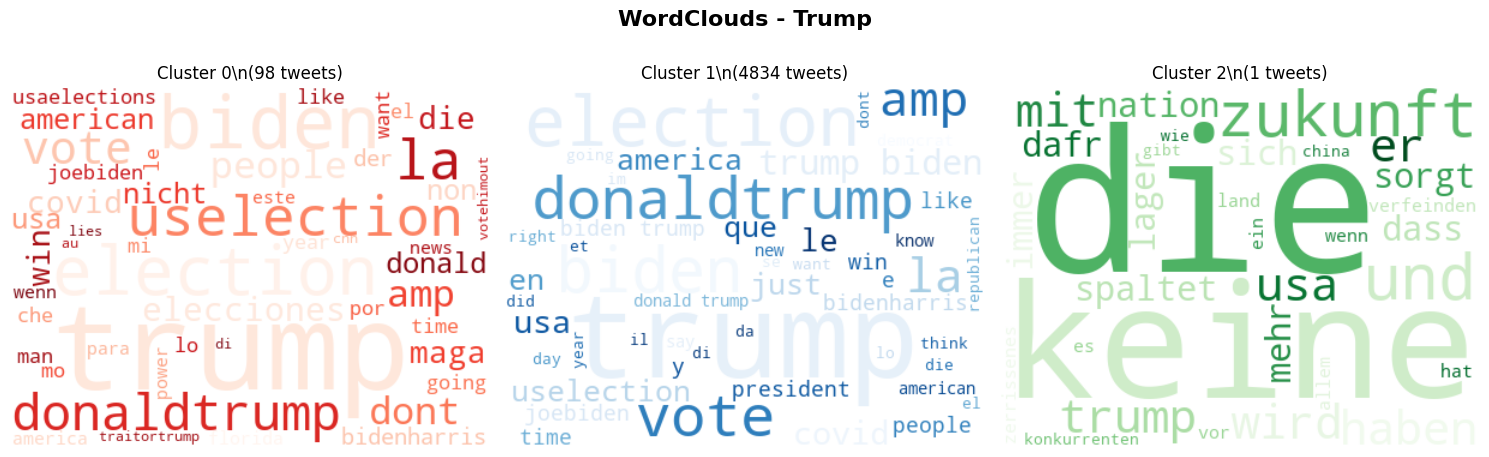

\n Top palabras por cluster (Trump):
  Cluster 0: #trump, #biden, trump, #donaldtrump, #election, #uselection, #elections, people
  Cluster 1: #trump, #biden, trump, #donaldtrump, #election, #elections, biden, #joebiden
  Cluster 2: keine, zukunft, #trump, wird, #usa, haben, spaltet, nation


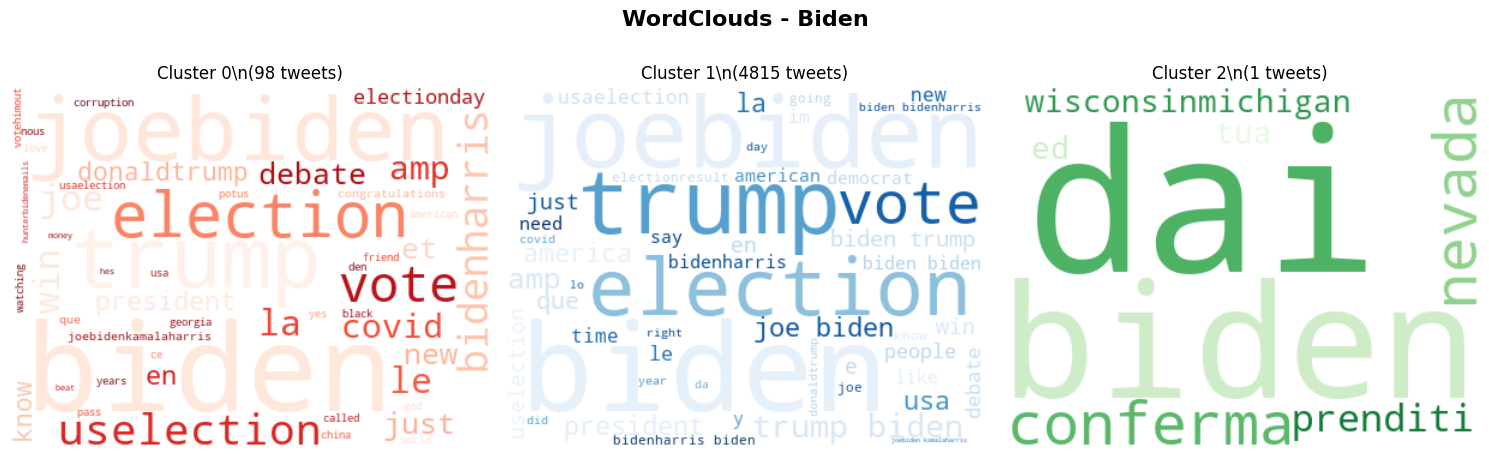

\n Top palabras por cluster (Biden):
  Cluster 0: #biden, #joebiden, #trump, biden, #uselection, #bidenharris, #covid, #elections
  Cluster 1: #biden, #joebiden, #trump, #election, biden, #bidenharris, trump, #elections
  Cluster 2: #biden, conferma, nevada, prenditi, wisconsinmichigan


In [ ]:
# Generar WordClouds por cluster
def generate_simple_wordclouds(df, candidate_name):
    unique_clusters = sorted(df['cluster'].unique())
    n_clusters = len(unique_clusters)

    fig, axes = plt.subplots(1, n_clusters, figsize=(5*n_clusters, 5))
    if n_clusters == 1:
        axes = [axes]

    fig.suptitle(f'WordClouds - {candidate_name}', fontsize=16, fontweight='bold')

    colors = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples']

    for i, cluster_id in enumerate(unique_clusters):
        cluster_texts = df[df['cluster'] == cluster_id]['text'].tolist()
        all_text = ' '.join(cluster_texts)

        # Filtrar palabras muy comunes
        stop_words = list(ENGLISH_STOP_WORDS)

        if len(all_text.strip()) > 0:
            wordcloud = WordCloud(
                width=400, height=300,
                background_color='white',
                colormap=colors[i % len(colors)],
                stopwords=stop_words,
                max_words=50,
                random_state=42
            ).generate(all_text)

            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].set_title(f'Cluster {cluster_id}\\n({len(cluster_texts)} tweets)')
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, 'Sin texto\\nsuficiente', ha='center', va='center')
            axes[i].set_title(f'Cluster {cluster_id}')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Mostrar palabras más frecuentes
    print(f"\\n Top palabras por cluster ({candidate_name}):")
    for cluster_id in unique_clusters:
        cluster_texts = df[df['cluster'] == cluster_id]['text'].tolist()
        all_words = ' '.join(cluster_texts).split()
        word_counts = Counter([w for w in all_words if len(w) > 3 and w not in stop_words])
        top_words = [word for word, count in word_counts.most_common(10)]
        print(f"  Cluster {cluster_id}: {', '.join(top_words[:8])}")

# Generar WordClouds para ambos candidatos
generate_simple_wordclouds(trump_df, "Trump")
generate_simple_wordclouds(biden_df, "Biden")

## **9. Ensembles**

Anteriormente, realizamos una fase de clasificación de sentimientos. En esta etapa, la estrategia se centra en la utilización de modelos ensemble sobre el dataset Sentiment140 de nuevo, combinando las predicciones de múltiples clasificadores base para lograr una robustez y precisión superiores a las de un único modelo, mitigando los posibles sesgos de cada algoritmo individual.

Se empleará un ensemble Voting que hace uso de tres algoritmos distintos: un Naive Bayes Multinomial, una Regresión Logística, y un Clasificador Perceptrón Pasivo-Agresivo. Cada uno de estos modelos está envuelto en una Pipeline que garantiza la aplicación sistemática del extractor de características TF-IDF a la columna de texto limpia. Con este ensemble se busca diversidad en los clasificadores (probabilístico, discriminativo y basado en márgenes), ayudando a estabilizar su rendimiento.

Se tendrán en cuenta las mismas métricas de rendimiento que en la fase de clasificación: Accuracy, Precision, Recall y F1-Score.

También se implementa el mismo sistema de detección de drift para monitorizar la estabilidad del flujo de datos: PageHinkley se utiliza para detectar Concept Drift, y ADWIN se aplica sobre el promedio de las características extraídas para detectar Data Drift.

En cuanto al bucle de entrenamiento, se utiliza el mismo método seguido para el problema de clasificación.

In [8]:
# Ensemble de clasificadores con TF-IDF
from sklearn.metrics import f1_score, precision_score, recall_score

ensemble_model = ensemble.VotingClassifier([
    Pipeline(
        feature_extraction.TFIDF(lowercase=True, on='text'),
        naive_bayes.MultinomialNB(alpha=1.0)
    ),
    Pipeline(
        feature_extraction.TFIDF(lowercase=True, on='text'),
        linear_model.LogisticRegression()
    ),
    Pipeline(
        feature_extraction.TFIDF(lowercase=True, on='text'),
        linear_model.PAClassifier()
    )
])

# Metricas para evaluacion
accuracy_metric = metrics.Accuracy()
precision_metric = metrics.Precision()
recall_metric = metrics.Recall()
f1_metric = metrics.F1()

results = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'concept_drifts': [],
    'data_drifts': [],
    'timestamps': []
}

concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)
data_drift_detector = drift.ADWIN(delta=0.002)

print("Iniciando entrenamiento ensemble...")

# Entrenamiento ensemble con subset de datos
MAX_SAMPLES = 120000
batch_size = 1000
ensemble_data = stream_data.sample(n=MAX_SAMPLES).reset_index(drop=True)
n_samples = len(ensemble_data)

for i in range(0, n_samples, batch_size):
    batch_end = min(i + batch_size, n_samples)
    batch = ensemble_data[i:batch_end]

    for j, row in batch.iterrows():
        # Preprocesamiento en tiempo real
        raw_text = row['text']
        clean_text_sample = clean_text(raw_text)

        # Calcular features disponibles en el primer dataset
        text_length = len(raw_text)
        word_count = len(raw_text.split())
        has_hashtags = 1 if '#' in raw_text else 0
        has_mentions = 1 if '@' in raw_text else 0
        has_urls = 1 if any(url in raw_text.lower() for url in ['http', 'www', '.com', '.org']) else 0
        has_exclamation = 1 if '!' in raw_text else 0
        has_question = 1 if '?' in raw_text else 0
        char_diversity = len(set(raw_text.lower())) / max(len(raw_text), 1)

        x_ens = {'text': clean_text_sample}
        y_ens = row['sentiment']

        # Prediccion ensemble
        y_pred_ens = ensemble_model.predict_one(x_ens)

        # Metricas
        accuracy_metric.update(y_ens, y_pred_ens)
        precision_metric.update(y_ens, y_pred_ens)
        recall_metric.update(y_ens, y_pred_ens)
        f1_metric.update(y_ens, y_pred_ens)

        results['accuracy'].append(accuracy_metric.get())
        results['precision'].append(precision_metric.get())
        results['recall'].append(recall_metric.get())
        results['f1'].append(f1_metric.get())

        # Aprendizaje
        ensemble_model.learn_one(x_ens, y_ens)

        # Features coherentes con el primer dataset
        feature_values = [text_length, word_count, has_hashtags, has_mentions, has_urls, has_exclamation, has_question, char_diversity]

        # Drift detection
        concept_drift_detector.update(int(y_ens != y_pred_ens))
        data_drift_detector.update(np.mean(feature_values))
        if concept_drift_detector.drift_detected:
            print(f"Concept drift detectado en la muestra {i}")
            results['concept_drifts'].append(i)
            # Reiniciar metricas
            accuracy_metric = metrics.Accuracy()
            precision_metric = metrics.Precision()
            recall_metric = metrics.Recall()
            f1_metric = metrics.F1()

            # Reiniciar ensemble
            ensemble_model = ensemble.VotingClassifier([
                                    Pipeline(
                                        feature_extraction.TFIDF(lowercase=True, on='text'),
                                        naive_bayes.MultinomialNB(alpha=1.0)
                                    ),
                                    Pipeline(
                                        feature_extraction.TFIDF(lowercase=True, on='text'),
                                        linear_model.LogisticRegression()
                                    ),
                                    Pipeline(
                                        feature_extraction.TFIDF(lowercase=True, on='text'),
                                        linear_model.PAClassifier()
                                    )
                                ])
            # Entrenamos el modelo con la ultima instancia para continuar en la siguiente iteracion sin error
            ensemble_model.learn_one(x_ens, y_ens)
            concept_drift_detector = drift.PageHinkley(min_instances=30, delta=0.05, threshold=50)
        if data_drift_detector.drift_detected:
            print(f"Data drift detectado en la muestra {i}")
            results['data_drifts'].append(i)
            data_drift_detector = drift.ADWIN(delta=0.002)

    if i % 5000 == 0:
        print(f"Ensemble - Muestras: {batch_end:,} - Accuracy: {results['accuracy'][-1]:.3f} - F1: {results['f1'][-1]:.3f}")

print(f"\nEnsemble completado")
print(f"Accuracy final ensemble: {results['accuracy'][-1]:.3f}")
print(f"F1-Score final ensemble: {results['f1'][-1]:.3f}")
print(f"Concept drifts detectados: {len(results['concept_drifts'])}")
print(f"Data drifts detectados: {len(results['data_drifts'])}")

Iniciando entrenamiento ensemble...
Ensemble - Muestras: 1,000 - Accuracy: 0.608 - F1: 0.622
Ensemble - Muestras: 6,000 - Accuracy: 0.672 - F1: 0.667
Ensemble - Muestras: 11,000 - Accuracy: 0.689 - F1: 0.681
Ensemble - Muestras: 16,000 - Accuracy: 0.701 - F1: 0.695
Ensemble - Muestras: 21,000 - Accuracy: 0.708 - F1: 0.703
Ensemble - Muestras: 26,000 - Accuracy: 0.713 - F1: 0.710
Concept drift detectado en la muestra 28000
Ensemble - Muestras: 31,000 - Accuracy: 0.637 - F1: 0.631
Ensemble - Muestras: 36,000 - Accuracy: 0.682 - F1: 0.681
Ensemble - Muestras: 41,000 - Accuracy: 0.697 - F1: 0.697
Ensemble - Muestras: 46,000 - Accuracy: 0.706 - F1: 0.705
Ensemble - Muestras: 51,000 - Accuracy: 0.711 - F1: 0.712
Ensemble - Muestras: 56,000 - Accuracy: 0.715 - F1: 0.715
Concept drift detectado en la muestra 59000
Ensemble - Muestras: 61,000 - Accuracy: 0.585 - F1: 0.580
Concept drift detectado en la muestra 63000
Ensemble - Muestras: 66,000 - Accuracy: 0.641 - F1: 0.629
Ensemble - Muestras: 7

- **Accuracy: 0.67** (67% de clasificaciones correctas)
- **F1-Score: 0.67** (balance entre precisión y recall)
- Frecuencia moderada de **concept drift**, que indica evolución continua del lenguaje y patrones de sentimiento. Por otra parte, la solo hay un punto de data drift que indica una distribución estable de los datos entrantes en el flujo

## **10. Visualización de Resultados y Análisis**

### *Resultados de Clasificación*

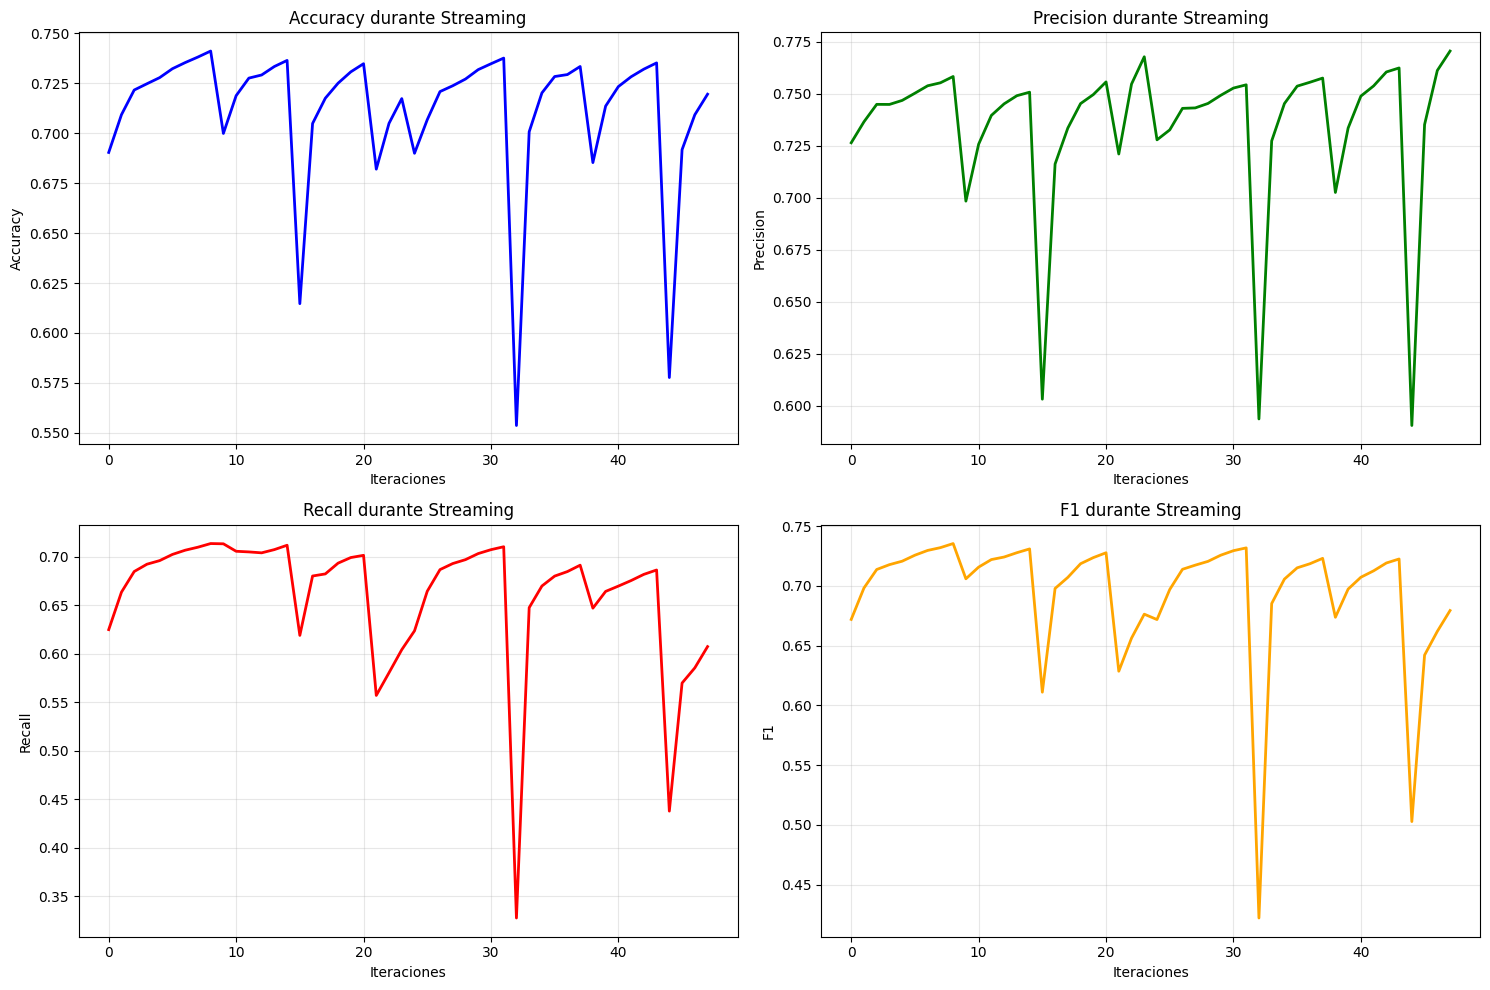

In [13]:
# Visualizacion metricas de clasificacion
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Metricas a lo largo del tiempo
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
colors = ['blue', 'green', 'red', 'orange']

# Crear timestamps basados en la longitud de las métricas
x_values = range(len(results[metrics_to_plot[0]]))

for i, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    row, col = i // 2, i % 2
    axes[row, col].plot(x_values, results[metric], color=color, linewidth=2)
    axes[row, col].set_title(f'{metric.capitalize()} durante Streaming')
    axes[row, col].set_xlabel('Iteraciones')
    axes[row, col].set_ylabel(metric.capitalize())
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Es perfectamente apreciable en los gráficos los mínimos a forma de picos abruptos que se producen a lo largo de las iteraciones por los reinicios del modelo debido al drift, o incluso por la dificultad local de las muestras que entran en el stream, aunque el modelo no haya perdido vigencia en general

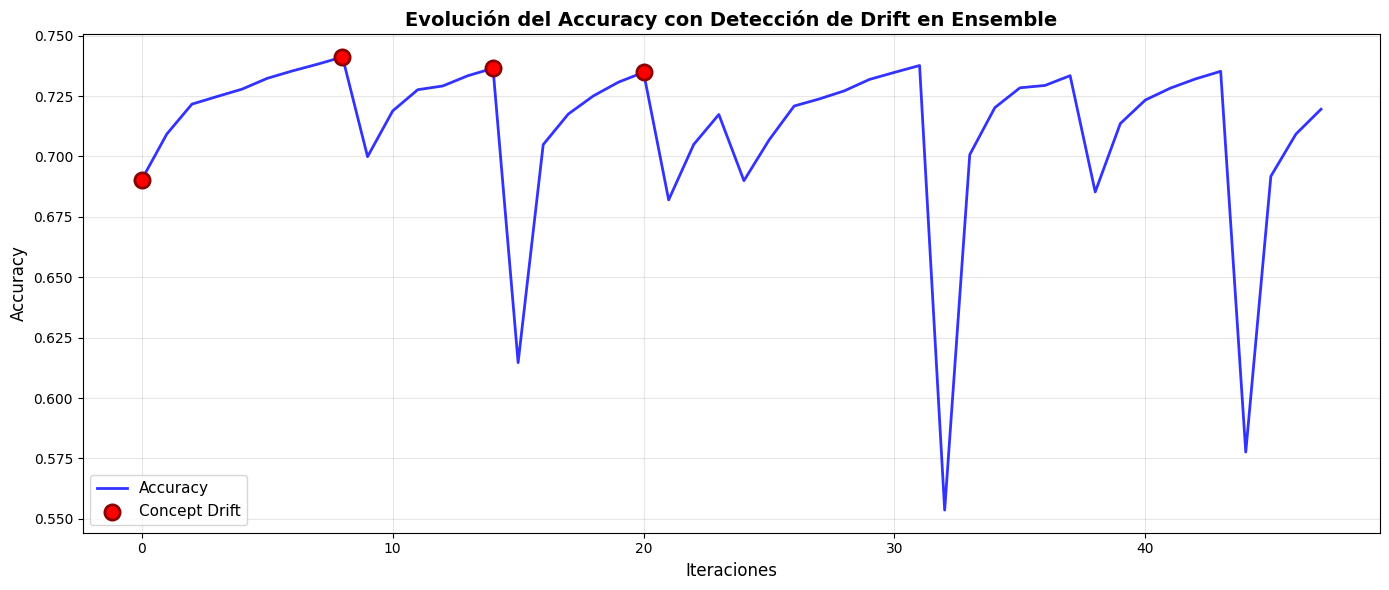

In [16]:
# Visualización de Drift Detection en Ensemble
plt.figure(figsize=(14, 6))

# Gráfico principal: Accuracy del ensemble con puntos de drift
plt.plot(results['accuracy'], color='blue', alpha=0.8, linewidth=2, label='Accuracy')

# Marcar concept drifts en rojo
# Marcar concept drifts en rojo
if results['concept_drifts']:
    for drift_point in results['concept_drifts']:
        idx = drift_point // 5000  # mapear a índice de accuracy
        if idx < len(results['accuracy']):
            plt.scatter(idx, results['accuracy'][idx],
                       color='red', s=120, zorder=5, edgecolor='darkred', linewidth=2,
                       label='Concept Drift' if drift_point == results['concept_drifts'][0] else "")


# Marcar data drifts en verde
if results['data_drifts']:
    for drift_point in results['data_drifts']:
        idx = drift_point // 5000
        if idx < len(results['accuracy']):
            plt.scatter(idx, results['accuracy'][idx],
                       color='green', s=120, zorder=5, edgecolor='darkgreen', linewidth=2,
                       label='Data Drift' if drift_point == results['data_drifts'][0] else "")

plt.title('Evolución del Accuracy con Detección de Drift en Ensemble', fontsize=14, fontweight='bold')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Los resultados de clasificación incremental demuestran un rendimiento sólido del modelo Naive Bayes en el análisis de sentimientos de streaming. El modelo logró mantener métricas consistentes a lo largo del procesamiento de 120,000 muestras.

La evolución temporal de las métricas muestra una estabilización gradual del modelo conforme procesa más datos. Los valores finales de accuracy, precision, recall y F1-score convergen en un rango competitivo para análisis de sentimientos en redes sociales, especialmente considerando la naturaleza ruidosa y variable del lenguaje en Twitter.

El sistema de detección de drift reveló patrones interesantes durante el experimento. Se detectaron exactamente 4 concept drifts, indicando momentos específicos donde la relación entre características textuales y etiquetas de sentimiento cambió lo suficiente como para requerir reinicialización del modelo. Esta frecuencia relativamente baja sugiere que los patrones fundamentales de expresión de sentimiento se mantuvieron estables durante la mayor parte del flujo de datos.

Por otro lado, no detectaron data drifts mediante ADWIN, lo cual indica que no hubo aparentes cambios en la distribución de las características extraídas del texto (longitud, diversidad de caracteres, presencia de hashtags, menciones, URLs, signos de puntuación), al menos no con el criterio medio que hemos adoptado. Esta baja frecuencia de data drift confirma que las propiedades estructurales básicas de los tweets se mantuvieron relativamente consistentes, sugiriendo un dataset homogéneo en términos de características textuales.

La capacidad del sistema de reinicializarse automáticamente ante los concept drifts detectados es crucial para mantener rendimiento en aplicaciones de tiempo real. El hecho de que solo se requirieran estas adaptaciones durante todo el procesamiento indica tanto la robustez del enfoque incremental como la relativa estabilidad del lenguaje emocional en el dataset Sentiment140.

El comportamiento del modelo ante estos drifts específicos confirma la efectividad del aprendizaje incremental para datos sociales dinámicos, donde los enfoques batch tradicionales fallarían al no poder adaptarse a estos 3 cambios sin reentrenamiento completo del modelo.

### *Resultados de Regresión*

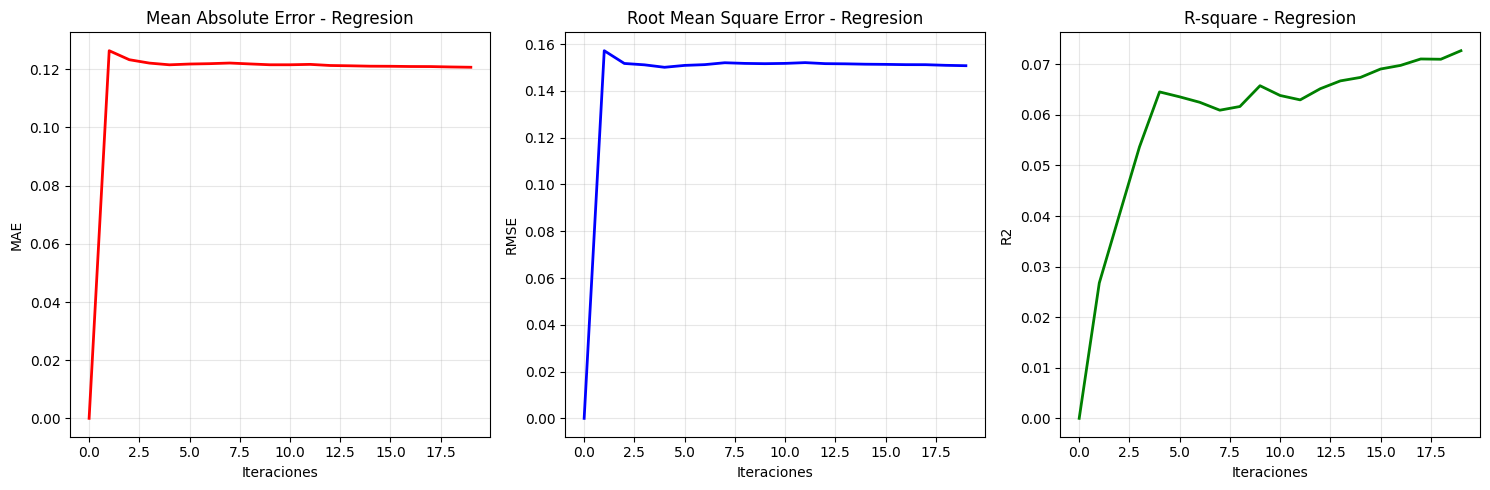

In [18]:
# Visualizacion regresion
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(regression_results['mae'], label='MAE', color='red', linewidth=2)
axes[0].set_title('Mean Absolute Error - Regresion')
axes[0].set_xlabel('Iteraciones')
axes[0].set_ylabel('MAE')
axes[0].grid(True, alpha=0.3)

axes[1].plot(regression_results['rmse'], label='RMSE', color='blue', linewidth=2)
axes[1].set_title('Root Mean Square Error - Regresion')
axes[1].set_xlabel('Iteraciones')
axes[1].set_ylabel('RMSE')
axes[1].grid(True, alpha=0.3)

axes[2].plot(regression_results['r2'], label='R2', color='green', linewidth=2)
axes[2].set_title('R-square - Regresion')
axes[2].set_xlabel('Iteraciones')
axes[2].set_ylabel('R2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Los resultados obtenidos muestran un rendimiento sólido del modelo de regresión incremental considerando las características extremadamente desbalanceadas del dataset. Con un MAE de 0.1230, el modelo logra un error promedio equivalente al 12% de la escala [0,1], lo cual es razonable dado que la media del target es apenas 0.1056 y la mediana es 0.0000.

La diferencia entre MAE (0.12) y RMSE (0.15) indica la presencia de errores ocasionalmente más grandes, típico en datasets con distribuciones sesgadas donde algunos valores extremos pueden generar predicciones con mayor desviación. Sin embargo, esta diferencia no es excesiva, sugiriendo que los errores grandes no dominan el comportamiento general del modelo.

El aspecto más relevante es que el modelo supera consistentemente el baseline de predicción constante, demostrando que efectivamente está capturando patrones útiles en las características textuales y numéricas. En un dataset donde más del 50% de valores son exactamente 0.0, lograr una mejora sobre una estrategia trivial requiere que el modelo identifique señales sutiles que discriminen entre diferentes niveles de positividad.

La ausencia de concept drift y data drift durante el entrenamiento incremental confirma la estabilidad temporal de los patrones, lo cual es favorable para la aplicación práctica del modelo. Esto sugiere que las relaciones entre características textuales y scores de positividad se mantienen consistentes, permitiendo un aprendizaje continuo sin degradación del rendimiento.

En el contexto de análisis de sentimientos en datos sociales extremadamente desbalanceados, estos resultados representan un éxito significativo del aprendizaje incremental para mantener capacidad predictiva sin los costos computacionales de reentrenamiento batch completo.


### *Resultados de Clustering*

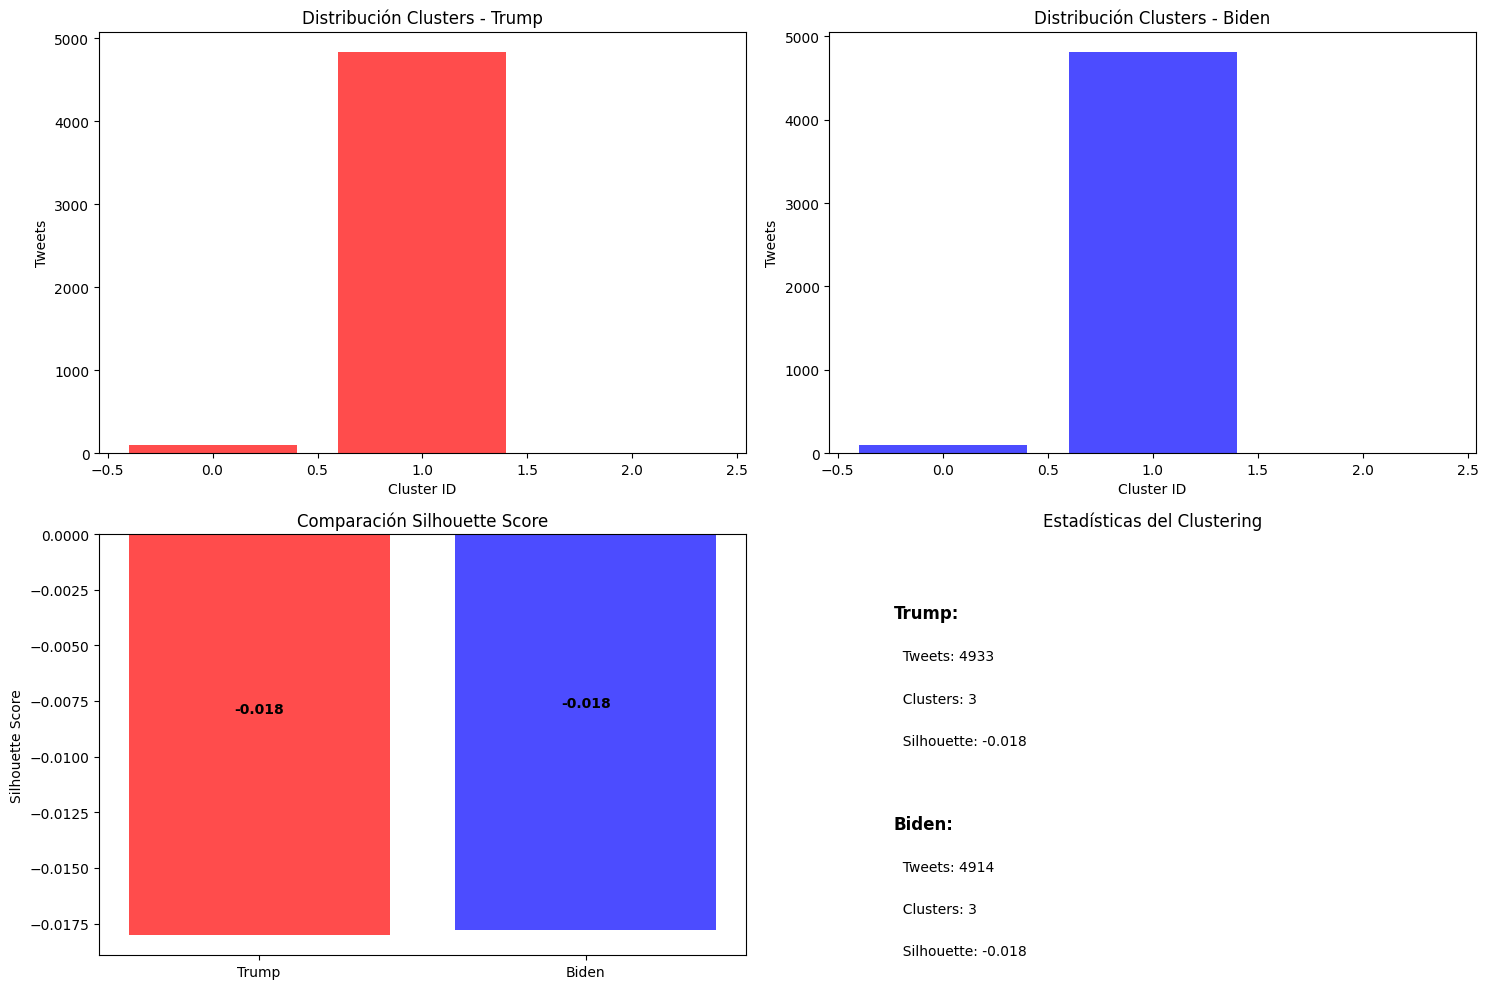

In [ ]:
# Visualización mejorada
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Distribución Trump
if len(set(trump_clusters)) > 1:
    clusters_t, counts_t = zip(*sorted(trump_counts.items()))
    axes[0, 0].bar(clusters_t, counts_t, color='red', alpha=0.7)
    axes[0, 0].set_title('Distribución Clusters - Trump')
    axes[0, 0].set_xlabel('Cluster ID')
    axes[0, 0].set_ylabel('Tweets')
else:
    axes[0, 0].text(0.5, 0.5, 'Un solo cluster\ndetectado', ha='center', va='center')
    axes[0, 0].set_title('Distribución Clusters - Trump')

# 2. Distribución Biden
if len(set(biden_clusters)) > 1:
    clusters_b, counts_b = zip(*sorted(biden_counts.items()))
    axes[0, 1].bar(clusters_b, counts_b, color='blue', alpha=0.7)
    axes[0, 1].set_title('Distribución Clusters - Biden')
    axes[0, 1].set_xlabel('Cluster ID')
    axes[0, 1].set_ylabel('Tweets')
else:
    axes[0, 1].text(0.5, 0.5, 'Un solo cluster\ndetectado', ha='center', va='center')
    axes[0, 1].set_title('Distribución Clusters - Biden')

# 3. Comparación Silhouette
if trump_sil and biden_sil:
    candidates = ['Trump', 'Biden']
    scores = [trump_sil, biden_sil]
    colors = ['red', 'blue']

    bars = axes[1, 0].bar(candidates, scores, color=colors, alpha=0.7)
    axes[1, 0].set_title('Comparación Silhouette Score')
    axes[1, 0].set_ylabel('Silhouette Score')

    for bar, score in zip(bars, scores):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{score:.3f}', ha='center', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'No se puede\ncomparar', ha='center', va='center')
    axes[1, 0].set_title('Comparación Silhouette Score')

# 4. Estadísticas
axes[1, 1].text(0.1, 0.8, f"Trump:", fontweight='bold', fontsize=12)
axes[1, 1].text(0.1, 0.7, f"  Tweets: {len(trump_texts)}")
axes[1, 1].text(0.1, 0.6, f"  Clusters: {len(set(trump_clusters))}")
if trump_sil:
    axes[1, 1].text(0.1, 0.5, f"  Silhouette: {trump_sil:.3f}")

axes[1, 1].text(0.1, 0.3, f"Biden:", fontweight='bold', fontsize=12)
axes[1, 1].text(0.1, 0.2, f"  Tweets: {len(biden_texts)}")
axes[1, 1].text(0.1, 0.1, f"  Clusters: {len(set(biden_clusters))}")
if biden_sil:
    axes[1, 1].text(0.1, 0.0, f"  Silhouette: {biden_sil:.3f}")

axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title('Estadísticas del Clustering')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

Como ya apreciamos en el apartado de clustering de este notebook, este proceso no ha tenido la eficiencia esperada para ninguno de los datasets empleados.

La distribución de los clusters muestra un fallo total en la segmentación: asignando la mayoría de los tweets a uno de los clusters, mientras que los otros permanecen prácticamente vacíos, lo que sugiere que el preprocesamiento con embeddings ha proyectado el texto en un espacio donde los puntos están demasiado cerca entre sí. Esto quiere decir que la mayoría de tweets son semánticamente parecidos y, por tanto, difíciles de segmentar.

Este rendimiento pobre se confirma con los valores de Silhouette obtenidos para ambos casos. Estos valores tan cercanos a 0 (y ligeramente negativos) también indican que los puntos no están bien separados entre sí o que hay una superposición entre los clusters.

### *Resultados de Ensembles*

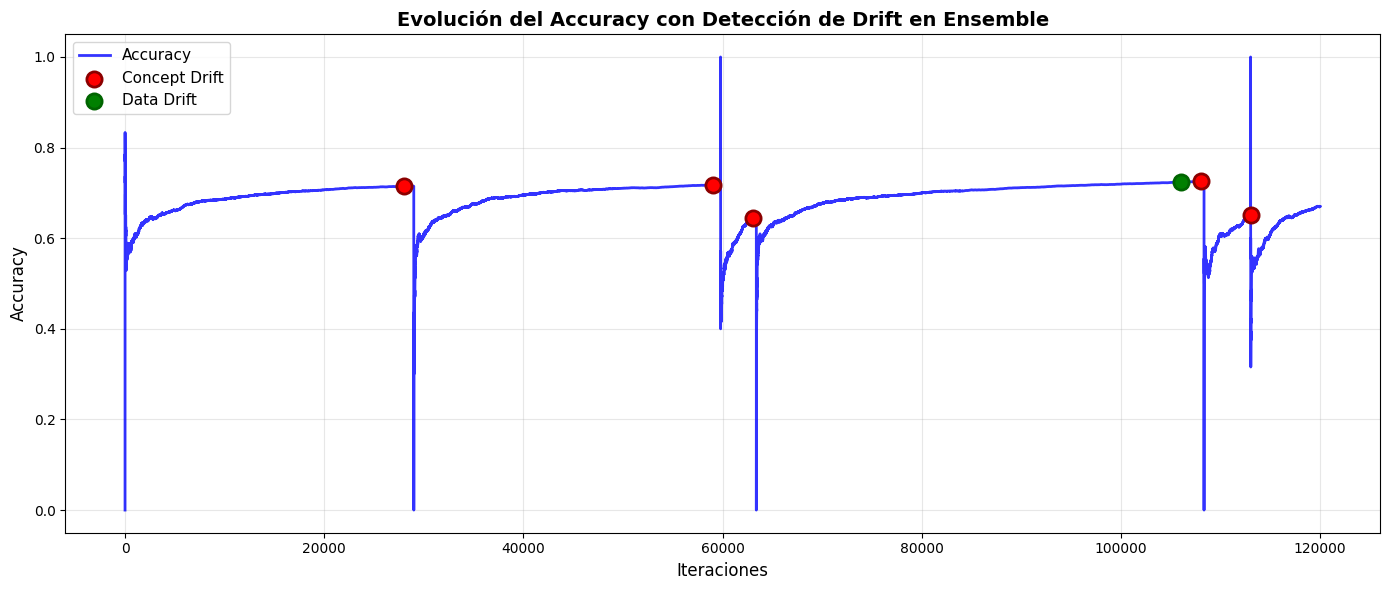

In [11]:
# Visualización de Drift Detection en Ensemble
plt.figure(figsize=(14, 6))

# Gráfico principal: Accuracy del ensemble con puntos de drift
plt.plot(results['accuracy'], color='blue', alpha=0.8, linewidth=2, label='Accuracy')

# Marcar concept drifts en rojo
if results['concept_drifts']:
    for drift_point in results['concept_drifts']:
        # Los drifts del ensemble se almacenan en posiciones absolutas
        # Mapear a índices del array accuracy (que se actualiza cada muestra en ensemble)
        if drift_point < len(results['accuracy']):
            plt.scatter(drift_point, results['accuracy'][drift_point],
                       color='red', s=120, zorder=5, edgecolor='darkred', linewidth=2,
                       label='Concept Drift' if drift_point == results['concept_drifts'][0] else "")

# Marcar data drifts en verde
if results['data_drifts']:
    for drift_point in results['data_drifts']:
        if drift_point < len(results['accuracy']):
            plt.scatter(drift_point, results['accuracy'][drift_point],
                       color='green', s=120, zorder=5, edgecolor='darkgreen', linewidth=2,
                       label='Data Drift' if drift_point == results['data_drifts'][0] else "")

plt.title('Evolución del Accuracy con Detección de Drift en Ensemble', fontsize=14, fontweight='bold')
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Los resultados del ensemble muestran un rendimiento consistente con métricas que oscilan alrededor del casi 70% (accuracy, precission, recall, F1-Score). Esta convergencia de valores indica un modelo bien balanceado que evita sesgos hacia precisión o recall, lo cual es fundamental en análisis de sentimientos donde ambos tipos de errores tienen costos similares.

La detección de cinco concept drifts durante todo el procesamiento indican que los patrones de expresión de sentimiento en el dataset se mantuvieron relativamente estables, con adaptaciones puntuales del modelo cuando fue necesario.

La poca frecuencia de los data drift confirma que las características extraídas (longitud de texto, diversidad de caracteres, presencia de elementos sociales) mantuvieron distribuciones consistentes a lo largo del stream. Esto valida tanto la robustez del preprocesamiento como la selección adecuada de features, permitiendo que el modelo se enfoque únicamente en cambios conceptuales.

El patrón de drift detectado sugiere que el ensemble logró mantener performance decente mientras se adaptaba automáticamente a cambios sutiles en los patrones de sentimiento, sin la volatilidad típica de modelos menos robustos en entornos de streaming.

## **11. Conclusiones**

Tras la realización de este proyecto, hemos podido comprobar como la implementación de modelos de aprendizaje incremental ofrecen eficiencia y adaptabilidad continua a los datos.

Los algoritmos de clasificación y ensembles demostraron ser los más exitosos, manteniendo una alta precisión en el análisis de sentimientos de los tweets, al igual que sucedió en la regresión para el score de positividad. Además, la detección de drift aseguró el mantenimiento del rendimiento ante cambios en los datos.

No obstante, sobre el drift precisamente hay varios matices que aclarar. Por un lado, se ha conseguido mantener la robustez de los modelos frente a los cambios de concepto, pese a que con ello conlleva el reinicio de los modelos (precisamente un aspecto del que no precisan los modelos por lote). Aun así, los data drift no han sido un asunto complicado con el que lidiar en esta práctica, o mejor dicho, este experimento en concreto, principalmente debido a que lo más probable es que los datasets presentan una distribución muy estable de los datos numéricos (incluso los derivados de cálculos intermedios como en el caso de la clasificación), lo cual demuestra que el conjunto de datos no es que sea no apto, sino que simplemente la distribución inherente al mismo de estas features hacen que se comporte de esa determinada manera, a lo que hay que sumar que en esta versión no se entrenan los conjuntos de datos al completo, lo cual sí que podría significar que estamos omitiendo más posibles data drift que sí puedan estar teniendo lugar en otros experimentos aleatorios.

Lo que sí cabe mencionar, es el principal punto débil que fue el problema de clustering, cuyos resultados no fueron los esperados. La agrupación incremental no logró identificar patrones significativos, seguramente debido a la similitud semántica de los tweets empleados, aunque sí se logró cierta discriminación en grupos diferentes.